In [ ]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

In [ ]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [ ]:
# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 2000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01 #0.5
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = float(1.20) #euro/km
params.platforms.min_fare = float(2) # euro
params.platforms.comm_rate = float(0.10)
params.platforms.discount = float(0.0) # float(0.0)
params.platforms.daily_marketing = False

params.d2d.learning_d = 1 #for TRB 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.2
params.d2d.B_Marketing = 0.0
params.d2d.diffusion_speed = 10/100 # speed for M is twice greater than WOM.
params.d2d.m = 5 #for TRB
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000
params.nV = 200
params.nD = 400
params.simTime = 4
params.d2d.res_wage = params.simTime*10.63 #euro

In [6]:
sim_rln_train,agent = MaaSSim.simulators.simulate_RLn_with_agent(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

This simulation uses albatros data


[2023-04-08 01:48:29,796] Setting up 4h simulation at 2023-04-07 23:48:02 for 200 vehicles and 2000 passengers in Amsterdam, Netherlands


initialization-----------------------
state_size =  2   action_size =  3   Lever = Commission   step =  0.05
fare =  1.2   comm_rate =  0.1   disc =  0.0   marketing = 0-100
-------------------------------------
---------------1585------------------
-------------------------------------
Day =  0
comm_rate =  0.05


[2023-04-08 01:48:38,289] simulation time 3.6 s


nP =  0    nV =  0
revenue =  0.0    npnv =  0.0
reward: 0.0
mean reward so far: nan
mean revenue so far: nan
Day =  1
comm_rate =  0.05


[2023-04-08 01:48:47,653] simulation time 4.2 s


nP =  27    nV =  2
revenue =  0.0004870261363636363    npnv =  0.019975
reward: 20.462026136363637
mean reward so far: 0.0
mean revenue so far: 0.0
Day =  2
comm_rate =  0.1


[2023-04-08 01:48:57,542] simulation time 4.5 s


nP =  33    nV =  5
revenue =  0.0015071522727272727    npnv =  0.035275
reward: 36.782152272727274
mean reward so far: 10.231013068181818
mean revenue so far: 4.28583
Day =  3
comm_rate =  0.05


[2023-04-08 01:49:08,053] simulation time 5.1 s


nP =  54    nV =  6
revenue =  0.001069646590909091    npnv =  0.04844999999999999
reward: 49.51964659090909
mean reward so far: 19.0813928030303
mean revenue so far: 11.69918
Day =  4
comm_rate =  0


[2023-04-08 01:49:18,912] simulation time 5.7 s


nP =  77    nV =  5
revenue =  0.0    npnv =  0.053975
reward: 53.975
mean reward so far: 26.69095625
mean revenue so far: 13.480830000000001
Day =  5
comm_rate =  0


[2023-04-08 01:49:29,549] simulation time 5.5 s


nP =  83    nV =  5
revenue =  0.0    npnv =  0.056525
reward: 56.525000000000006
mean reward so far: 32.147765
mean revenue so far: 10.784664000000001
Day =  6
comm_rate =  0.0


[2023-04-08 01:49:41,570] simulation time 6.6 s


nP =  112    nV =  14
revenue =  0.0    npnv =  0.1071
reward: 107.1
mean reward so far: 36.2106375
mean revenue so far: 8.98722
Day =  7
comm_rate =  0


[2023-04-08 01:49:53,947] simulation time 6.9 s


nP =  122    nV =  11
revenue =  0.0    npnv =  0.0986
reward: 98.6
mean reward so far: 46.33768928571429
mean revenue so far: 7.703331428571429
Day =  8
comm_rate =  0.0


[2023-04-08 01:50:06,276] simulation time 7.1 s


nP =  130    nV =  15
revenue =  0.0    npnv =  0.11900000000000001
reward: 119.00000000000001
mean reward so far: 52.870478125
mean revenue so far: 6.7404150000000005
Day =  9
comm_rate =  0.05


[2023-04-08 01:50:18,532] simulation time 6.8 s


nP =  123    nV =  10
revenue =  0.002677711363636364    npnv =  0.094775
reward: 97.45271136363637
mean reward so far: 60.21820277777778
mean revenue so far: 5.99148
Day =  10
comm_rate =  0.05


[2023-04-08 01:50:31,455] simulation time 7.6 s


nP =  152    nV =  10
revenue =  0.003203489772727273    npnv =  0.1071
reward: 110.30348977272726
mean reward so far: 63.94165363636364
mean revenue so far: 10.105104
Day =  11
comm_rate =  0.05


[2023-04-08 01:50:44,868] simulation time 8.1 s


nP =  173    nV =  15
revenue =  0.0038903397727272724    npnv =  0.13727499999999998
reward: 141.16533977272724
mean reward so far: 68.1563660123967
mean revenue so far: 14.312041818181818
Day =  12
comm_rate =  0.1


[2023-04-08 01:50:57,739] simulation time 7.4 s


nP =  143    nV =  17
revenue =  0.005934213636363636    npnv =  0.133025
reward: 138.95921363636364
mean reward so far: 74.24044715909092
mean revenue so far: 18.82520333333333
Day =  13
comm_rate =  0.05


[2023-04-08 01:51:10,570] simulation time 7.6 s


nP =  141    nV =  16
revenue =  0.0029412886363636365    npnv =  0.12792499999999998
reward: 130.86628863636363
mean reward so far: 79.21881381118881
mean revenue so far: 25.41112307692308
Day =  14
comm_rate =  0


[2023-04-08 01:51:23,251] simulation time 7.4 s


nP =  144    nV =  16
revenue =  0.0    npnv =  0.12919999999999998
reward: 129.2
mean reward so far: 82.90791915584416
mean revenue so far: 27.29366285714286
Day =  15
comm_rate =  0.05


[2023-04-08 01:51:36,874] simulation time 8.1 s


nP =  170    nV =  15
revenue =  0.0032361215909090914    npnv =  0.136
reward: 139.23612159090908
mean reward so far: 85.99405787878787
mean revenue so far: 25.474085333333335
Day =  16
comm_rate =  0.1


[2023-04-08 01:51:50,561] simulation time 8.2 s


nP =  165    nV =  22
revenue =  0.007344081818181817    npnv =  0.163625
reward: 170.96908181818182
mean reward so far: 89.32168686079544
mean revenue so far: 27.44168875
Day =  17
comm_rate =  0.05


[2023-04-08 01:52:03,679] simulation time 7.7 s


nP =  154    nV =  17
revenue =  0.0032645920454545453    npnv =  0.1377
reward: 140.96459204545457
mean reward so far: 94.12447479946523
mean revenue so far: 33.430756470588236
Day =  18
comm_rate =  0.1


[2023-04-08 01:52:16,851] simulation time 7.7 s


nP =  157    nV =  12
revenue =  0.006906018181818183    npnv =  0.11772500000000001
reward: 124.63101818181819
mean reward so far: 96.72670353535352
mean revenue so far: 34.76553777777778
Day =  19
comm_rate =  0.05


[2023-04-08 01:52:30,131] simulation time 7.8 s


nP =  158    nV =  13
revenue =  0.003427095454545455    npnv =  0.12240000000000001
reward: 125.82709545454547
mean reward so far: 98.19535167464115
mean revenue so far: 39.33292631578947
Day =  20
comm_rate =  0


[2023-04-08 01:52:43,316] simulation time 7.9 s


nP =  160    nV =  23
revenue =  0.0    npnv =  0.16575
reward: 165.75
mean reward so far: 99.57693886363636
mean revenue so far: 40.382124
Day =  21
comm_rate =  0.05


[2023-04-08 01:52:56,966] simulation time 8.2 s


nP =  173    nV =  14
revenue =  0.003579761363636364    npnv =  0.133025
reward: 136.60476136363636
mean reward so far: 102.72803701298702
mean revenue so far: 38.45916571428571
Day =  22
comm_rate =  0


[2023-04-08 01:53:10,166] simulation time 7.7 s


nP =  157    nV =  20
revenue =  0.0    npnv =  0.151725
reward: 151.725
mean reward so far: 104.26788811983471
mean revenue so far: 39.574830909090906
Day =  23
comm_rate =  0.05


[2023-04-08 01:53:22,821] simulation time 7.4 s


nP =  142    nV =  17
revenue =  0.0028036522727272724    npnv =  0.1326
reward: 135.40365227272727
mean reward so far: 106.33124081027668
mean revenue so far: 37.85418608695652
Day =  24
comm_rate =  0.05


[2023-04-08 01:53:36,012] simulation time 7.7 s


nP =  154    nV =  22
revenue =  0.003190410227272727    npnv =  0.15895
reward: 162.14041022727272
mean reward so far: 107.54259128787878
mean revenue so far: 38.33294000000001
Day =  25
comm_rate =  0.1


[2023-04-08 01:53:49,237] simulation time 7.8 s


nP =  158    nV =  15
revenue =  0.0070761977272727275    npnv =  0.1309
reward: 137.97619772727273
mean reward so far: 109.72650404545453
mean revenue so far: 39.04567120000001
Day =  26
comm_rate =  0.15


[2023-04-08 01:54:02,103] simulation time 7.6 s


nP =  156    nV =  11
revenue =  0.010007232954545454    npnv =  0.11305
reward: 123.05723295454547
mean reward so far: 110.81303072552447
mean revenue so far: 42.33395615384616
Day =  27
comm_rate =  0.15


[2023-04-08 01:54:15,228] simulation time 7.7 s


nP =  154    nV =  19
revenue =  0.009899413636363635    npnv =  0.1462
reward: 156.09941363636364
mean reward so far: 111.26651969696968
mean revenue so far: 47.28926518518519
Day =  28
comm_rate =  0.1


[2023-04-08 01:54:28,038] simulation time 7.5 s


nP =  149    nV =  16
revenue =  0.006375997727272727    npnv =  0.131325
reward: 137.70099772727272
mean reward so far: 112.86769448051948
mean revenue so far: 51.822851428571425
Day =  29
comm_rate =  0.15


[2023-04-08 01:54:41,615] simulation time 8.1 s


nP =  170    nV =  14
revenue =  0.010036517045454545    npnv =  0.13175
reward: 141.78651704545456
mean reward so far: 113.72401528213166
mean revenue so far: 53.9054275862069
Day =  30
comm_rate =  0.2


[2023-04-08 01:54:54,848] simulation time 7.9 s


nP =  152    nV =  14
revenue =  0.012309400000000002    npnv =  0.12410000000000002
reward: 136.40940000000003
mean reward so far: 114.65943200757576
mean revenue so far: 57.996669999999995
Day =  31
comm_rate =  0.15


[2023-04-08 01:55:08,596] simulation time 8.5 s


nP =  183    nV =  19
revenue =  0.011462942045454543    npnv =  0.158525
reward: 169.98794204545456
mean reward so far: 115.36104387829911
mean revenue so far: 63.11437225806451
Day =  32
comm_rate =  0.15


[2023-04-08 01:55:21,804] simulation time 7.9 s


nP =  163    nV =  14
revenue =  0.010486684090909089    npnv =  0.12877500000000003
reward: 139.2616840909091
mean reward so far: 117.06813444602273
mean revenue so far: 67.44666625
Day =  33
comm_rate =  0.15


[2023-04-08 01:55:35,473] simulation time 8.1 s


nP =  173    nV =  17
revenue =  0.010800535227272728    npnv =  0.145775
reward: 156.5755352272727
mean reward so far: 117.74066625344352
mean revenue so far: 70.99572606060606
Day =  34
comm_rate =  0.15


[2023-04-08 01:55:48,759] simulation time 8.0 s


nP =  165    nV =  19
revenue =  0.0102720375    npnv =  0.15087499999999998
reward: 161.1470375
mean reward so far: 118.88286828208555
mean revenue so far: 74.49848176470587
Day =  35
comm_rate =  0.1


[2023-04-08 01:56:01,817] simulation time 7.6 s


nP =  150    nV =  16
revenue =  0.006130431818181818    npnv =  0.13175
reward: 137.88043181818182
mean reward so far: 120.09041597402597
mean revenue so far: 77.53532114285713
Day =  36
comm_rate =  0.05


[2023-04-08 01:56:14,888] simulation time 7.8 s


nP =  155    nV =  18
revenue =  0.0032990022727272723    npnv =  0.14237499999999997
reward: 145.67400227272725
mean reward so far: 120.58458308080809
mean revenue so far: 78.3786622222222
Day =  37
comm_rate =  0.05


[2023-04-08 01:56:28,203] simulation time 7.8 s


nP =  159    nV =  20
revenue =  0.0034368613636363643    npnv =  0.152575
reward: 156.01186136363634
mean reward so far: 121.2626754914005
mean revenue so far: 77.82957513513513
Day =  38
comm_rate =  0


[2023-04-08 01:56:41,261] simulation time 7.7 s


nP =  142    nV =  17
revenue =  0.0    npnv =  0.1326
reward: 132.6
mean reward so far: 122.17712775119617
mean revenue so far: 77.37323789473685
Day =  39
comm_rate =  0.05


[2023-04-08 01:56:54,841] simulation time 8.1 s


nP =  175    nV =  14
revenue =  0.0037088375000000006    npnv =  0.133875
reward: 137.5838375
mean reward so far: 122.44438088578089
mean revenue so far: 75.38930871794871
Day =  40
comm_rate =  0.05


[2023-04-08 01:57:09,412] simulation time 8.8 s


nP =  178    nV =  16
revenue =  0.0035124943181818183    npnv =  0.14364999999999997
reward: 147.16249431818179
mean reward so far: 122.82286730113637
mean revenue so far: 75.1364645
Day =  41
comm_rate =  0


[2023-04-08 01:57:23,444] simulation time 8.5 s


nP =  179    nV =  15
revenue =  0.0    npnv =  0.13982499999999998
reward: 139.825
mean reward so far: 123.4165167405765
mean revenue so far: 74.81167024390244
Day =  42
comm_rate =  0.0


[2023-04-08 01:57:37,581] simulation time 8.7 s


nP =  195    nV =  21
revenue =  0.0    npnv =  0.172125
reward: 172.125
mean reward so far: 123.8071949134199
mean revenue so far: 73.03044
Day =  43
comm_rate =  0.0


[2023-04-08 01:57:50,862] simulation time 7.7 s


nP =  156    nV =  17
revenue =  0.0    npnv =  0.13855
reward: 138.55
mean reward so far: 124.93086479915434
mean revenue so far: 71.3320576744186
Day =  44
comm_rate =  0.0


[2023-04-08 01:58:04,432] simulation time 8.1 s


nP =  170    nV =  18
revenue =  0.0    npnv =  0.14875
reward: 148.75
mean reward so far: 125.24039059917355
mean revenue so far: 69.71087454545454
Day =  45
comm_rate =  0.05


[2023-04-08 01:58:18,342] simulation time 8.6 s


nP =  192    nV =  17
revenue =  0.003979271590909091    npnv =  0.15385
reward: 157.8292715909091
mean reward so far: 125.76282636363636
mean revenue so far: 68.161744
Day =  46
comm_rate =  0.05


[2023-04-08 01:58:31,687] simulation time 8.0 s


nP =  167    nV =  17
revenue =  0.003668980681818182    npnv =  0.14322500000000002
reward: 146.8939806818182
mean reward so far: 126.45992299901187
mean revenue so far: 68.20247086956522
Day =  47
comm_rate =  0.1


[2023-04-08 01:58:45,372] simulation time 8.2 s


nP =  175    nV =  15
revenue =  0.007150102272727273    npnv =  0.13812499999999997
reward: 145.27510227272725
mean reward so far: 126.89469018375242
mean revenue so far: 68.12527063829786
Day =  48
comm_rate =  0.05


[2023-04-08 01:58:58,384] simulation time 7.6 s


nP =  176    nV =  9
revenue =  0.003657955681818182    npnv =  0.11305
reward: 116.70795568181819
mean reward so far: 127.27761543560605
mean revenue so far: 69.32769833333333
Day =  49
comm_rate =  0


[2023-04-08 01:59:11,360] simulation time 7.7 s


nP =  155    nV =  20
revenue =  0.0    npnv =  0.15087499999999998
reward: 150.875
mean reward so far: 127.06190809369201
mean revenue so far: 69.22672530612245
Day =  50
comm_rate =  0.0


[2023-04-08 01:59:24,586] simulation time 7.8 s


nP =  161    nV =  15
revenue =  0.0    npnv =  0.132175
reward: 132.175
mean reward so far: 127.53816993181817
mean revenue so far: 67.8421908
Day =  51
comm_rate =  0.0


[2023-04-08 01:59:38,367] simulation time 8.2 s


nP =  179    nV =  14
revenue =  0.0    npnv =  0.135575
reward: 135.575
mean reward so far: 127.6290881684492
mean revenue so far: 66.51195176470588
Day =  52
comm_rate =  0


[2023-04-08 01:59:52,009] simulation time 8.4 s


nP =  183    nV =  21
revenue =  0.0    npnv =  0.167025
reward: 167.025
mean reward so far: 127.78189416520978
mean revenue so far: 65.23287576923077
Day =  53
comm_rate =  0.05


[2023-04-08 02:00:05,333] simulation time 7.8 s


nP =  175    nV =  11
revenue =  0.0036828124999999995    npnv =  0.12112499999999998
reward: 124.80781249999998
mean reward so far: 128.52233012435676
mean revenue so far: 64.00206679245282
Day =  54
comm_rate =  0


[2023-04-08 02:00:19,233] simulation time 8.6 s


nP =  193    nV =  21
revenue =  0.0    npnv =  0.171275
reward: 171.275
mean reward so far: 128.45354276094275
mean revenue so far: 64.01716740740741
Day =  55
comm_rate =  0.05


[2023-04-08 02:00:33,425] simulation time 8.6 s


nP =  193    nV =  22
revenue =  0.0038455897727272723    npnv =  0.17552500000000001
reward: 179.37058977272727
mean reward so far: 129.2321147107438
mean revenue so far: 62.85321890909091
Day =  56
comm_rate =  0.05


[2023-04-08 02:00:46,804] simulation time 8.1 s


nP =  170    nV =  20
revenue =  0.0033284465909090913    npnv =  0.15725
reward: 160.5784465909091
mean reward so far: 130.12744462256492
mean revenue so far: 62.939453928571425
Day =  57
comm_rate =  0.1


[2023-04-08 02:00:59,826] simulation time 7.7 s


nP =  151    nV =  23
revenue =  0.005999677272727273    npnv =  0.16192499999999999
reward: 167.92467727272728
mean reward so far: 130.66167272727273
mean revenue so far: 62.86298385964912
Day =  58
comm_rate =  0.1


[2023-04-08 02:01:13,524] simulation time 8.1 s


nP =  170    nV =  25
revenue =  0.006924165909090909    npnv =  0.17850000000000002
reward: 185.42416590909093
mean reward so far: 131.304138322884
mean revenue so far: 63.59973103448276
Day =  59
comm_rate =  0.15


[2023-04-08 02:01:27,664] simulation time 8.8 s


nP =  193    nV =  21
revenue =  0.011725206818181816    npnv =  0.171275
reward: 183.00020681818182
mean reward so far: 132.22142692604007
mean revenue so far: 64.5872833898305
Day =  60
comm_rate =  0.15


[2023-04-08 02:01:41,797] simulation time 8.5 s


nP =  188    nV =  18
revenue =  0.01152869659090909    npnv =  0.15639999999999998
reward: 167.92869659090908
mean reward so far: 133.06773992424243
mean revenue so far: 66.95022266666666
Day =  61
comm_rate =  0.1


[2023-04-08 02:01:55,696] simulation time 8.5 s


nP =  187    nV =  18
revenue =  0.0078664    npnv =  0.155975
reward: 163.8414
mean reward so far: 133.6392310171386
mean revenue so far: 69.17899049180328
Day =  62
comm_rate =  0.1


[2023-04-08 02:02:09,502] simulation time 8.1 s


nP =  172    nV =  16
revenue =  0.006982859090909092    npnv =  0.14109999999999998
reward: 148.0828590909091
mean reward so far: 134.1263627749267
mean revenue so far: 70.2962429032258
Day =  63
comm_rate =  0.1


[2023-04-08 02:02:23,325] simulation time 8.5 s


nP =  185    nV =  18
revenue =  0.007745368181818184    npnv =  0.15512499999999999
reward: 162.87036818181818
mean reward so far: 134.34789446248197
mean revenue so far: 71.13119650793651
Day =  64
comm_rate =  0.05


[2023-04-08 02:02:37,341] simulation time 8.4 s


nP =  180    nV =  18
revenue =  0.0034637011363636365    npnv =  0.153
reward: 156.46370113636362
mean reward so far: 134.79355811434658
mean revenue so far: 72.1497478125
Day =  65
comm_rate =  0


[2023-04-08 02:02:51,101] simulation time 8.4 s


nP =  183    nV =  22
revenue =  0.0    npnv =  0.171275
reward: 171.275
mean reward so far: 135.1269449300699
mean revenue so far: 71.97761538461539
Day =  66
comm_rate =  0.0


[2023-04-08 02:03:05,055] simulation time 8.3 s


nP =  179    nV =  16
revenue =  0.0    npnv =  0.14407499999999998
reward: 144.075
mean reward so far: 135.67464273415976
mean revenue so far: 70.88704545454546
Day =  67
comm_rate =  0.05


[2023-04-08 02:03:19,143] simulation time 8.8 s


nP =  198    nV =  18
revenue =  0.003952909090909091    npnv =  0.16065
reward: 164.6029090909091
mean reward so far: 135.8000212008141
mean revenue so far: 69.82902985074627
Day =  68
comm_rate =  0


[2023-04-08 02:03:32,931] simulation time 8.2 s


nP =  175    nV =  20
revenue =  0.0    npnv =  0.159375
reward: 159.375
mean reward so far: 136.22359308155077
mean revenue so far: 69.82523823529412
Day =  69
comm_rate =  0


[2023-04-08 02:03:46,656] simulation time 8.4 s


nP =  184    nV =  16
revenue =  0.0    npnv =  0.1462
reward: 146.2
mean reward so far: 136.55912071805005
mean revenue so far: 68.81327826086957
Day =  70
comm_rate =  0.05


[2023-04-08 02:04:01,112] simulation time 9.1 s


nP =  215    nV =  21
revenue =  0.004236025    npnv =  0.18062499999999998
reward: 184.861025
mean reward so far: 136.69684756493507
mean revenue so far: 67.83023142857144
Day =  71
comm_rate =  0.05


[2023-04-08 02:04:15,358] simulation time 8.7 s


nP =  193    nV =  19
revenue =  0.0038339102272727274    npnv =  0.162775
reward: 166.60891022727273
mean reward so far: 137.37521626120358
mean revenue so far: 67.92493295774648
Day =  72
comm_rate =  0.05


[2023-04-08 02:04:29,886] simulation time 9.2 s


nP =  215    nV =  18
revenue =  0.004293751136363636    npnv =  0.167875
reward: 172.16875113636362
mean reward so far: 137.7812397885101
mean revenue so far: 67.91870916666667
Day =  73
comm_rate =  0


[2023-04-08 02:04:44,519] simulation time 9.0 s


nP =  208    nV =  21
revenue =  0.0    npnv =  0.17764999999999997
reward: 177.65
mean reward so far: 138.25230158779576
mean revenue so far: 68.02352164383562
Day =  74
comm_rate =  0.05


[2023-04-08 02:04:58,276] simulation time 8.4 s


nP =  184    nV =  18
revenue =  0.003753557954545455    npnv =  0.1547
reward: 158.45355795454543
mean reward so far: 138.7847029176904
mean revenue so far: 67.10428486486487
Day =  75
comm_rate =  0.05


[2023-04-08 02:05:11,830] simulation time 8.2 s


nP =  174    nV =  16
revenue =  0.0033253329545454547    npnv =  0.14195
reward: 145.27533295454543
mean reward so far: 139.0469543181818
mean revenue so far: 67.090396
Day =  76
comm_rate =  0.05


[2023-04-08 02:05:26,116] simulation time 8.7 s


nP =  196    nV =  24
revenue =  0.003773886363636364    npnv =  0.1853
reward: 189.07388636363638
mean reward so far: 139.12890666866028
mean revenue so far: 66.9777047368421
Day =  77
comm_rate =  0.1


[2023-04-08 02:05:40,400] simulation time 8.9 s


nP =  204    nV =  21
revenue =  0.007961481818181817    npnv =  0.17595
reward: 183.9114818181818
mean reward so far: 139.77754276859503
mean revenue so far: 66.97046701298702
Day =  78
comm_rate =  0.05


[2023-04-08 02:05:55,467] simulation time 9.4 s


nP =  221    nV =  28
revenue =  0.004367384090909091    npnv =  0.212925
reward: 217.2923840909091
mean reward so far: 140.34336249999998
mean revenue so far: 67.90830820512821
Day =  79
comm_rate =  0.1


[2023-04-08 02:06:09,782] simulation time 9.0 s


nP =  210    nV =  14
revenue =  0.00814203409090909    npnv =  0.14875
reward: 156.89203409090908
mean reward so far: 141.3174007479862
mean revenue so far: 68.02169620253164
Day =  80
comm_rate =  0.05


[2023-04-08 02:06:24,807] simulation time 9.7 s


nP =  219    nV =  29
revenue =  0.0042998181818181816    npnv =  0.216325
reward: 220.6248181818182
mean reward so far: 141.51208366477272
mean revenue so far: 68.9626725
Day =  81
comm_rate =  0.1


[2023-04-08 02:06:39,396] simulation time 9.2 s


nP =  216    nV =  25
revenue =  0.008141972727272727    npnv =  0.19804999999999998
reward: 206.1919727272727
mean reward so far: 142.48878409090906
mean revenue so far: 69.04556296296296
Day =  82
comm_rate =  0.1


[2023-04-08 02:06:54,312] simulation time 9.6 s


nP =  230    nV =  23
revenue =  0.008688472727272727    npnv =  0.1955
reward: 204.18847272727274
mean reward so far: 143.26565224501107
mean revenue so far: 69.95108926829268
Day =  83
comm_rate =  0.15


[2023-04-08 02:07:08,975] simulation time 9.0 s


nP =  206    nV =  25
revenue =  0.012760397727272726    npnv =  0.19379999999999997
reward: 206.56039772727271
mean reward so far: 143.99966213033952
mean revenue so far: 70.95067999999999
Day =  84
comm_rate =  0.1


[2023-04-08 02:07:23,835] simulation time 9.5 s


nP =  228    nV =  23
revenue =  0.008792440909090909    npnv =  0.19465
reward: 203.44244090909092
mean reward so far: 144.7444327922078
mean revenue so far: 72.77963619047618
Day =  85
comm_rate =  0.15


[2023-04-08 02:07:38,710] simulation time 9.5 s


nP =  231    nV =  20
revenue =  0.013306857954545451    npnv =  0.183175
reward: 196.48185795454546
mean reward so far: 145.4349975935829
mean revenue so far: 73.74395764705882
Day =  86
comm_rate =  0.1


[2023-04-08 02:07:53,546] simulation time 9.1 s


nP =  214    nV =  22
revenue =  0.00824570909090909    npnv =  0.18445
reward: 192.69570909090908
mean reward so far: 146.02856573731503
mean revenue so far: 75.60973372093024
Day =  87
comm_rate =  0.15


[2023-04-08 02:08:08,585] simulation time 9.7 s


nP =  234    nV =  22
revenue =  0.013536828409090908    npnv =  0.19295
reward: 206.48682840909092
mean reward so far: 146.56496968390806
mean revenue so far: 76.40875379310346
Day =  88
comm_rate =  0.1


[2023-04-08 02:08:23,003] simulation time 9.0 s


nP =  213    nV =  15
revenue =  0.008619784090909091    npnv =  0.154275
reward: 162.8947840909091
mean reward so far: 147.24589989669423
mean revenue so far: 78.24783818181817
Day =  89
comm_rate =  0.1


[2023-04-08 02:08:37,796] simulation time 9.2 s


nP =  215    nV =  20
revenue =  0.008426770454545453    npnv =  0.176375
reward: 184.80177045454548
mean reward so far: 147.42173005617977
mean revenue so far: 79.07323550561797
Day =  90
comm_rate =  0.15


[2023-04-08 02:08:53,268] simulation time 10.1 s


nP =  242    nV =  31
revenue =  0.01494835909090909    npnv =  0.2346
reward: 249.54835909090912
mean reward so far: 147.83706383838384
mean revenue so far: 79.84254577777777
Day =  91
comm_rate =  0.1


[2023-04-08 02:09:08,164] simulation time 9.5 s


nP =  229    nV =  23
revenue =  0.008858377272727272    npnv =  0.195075
reward: 203.93337727272728
mean reward so far: 148.95477037962038
mean revenue so far: 81.85626637362637
Day =  92
comm_rate =  0.1


[2023-04-08 02:09:23,859] simulation time 10.0 s


nP =  247    nV =  25
revenue =  0.009606004545454546    npnv =  0.211225
reward: 220.83100454545453
mean reward so far: 149.55236393280634
mean revenue so far: 82.6611704347826
Day =  93
comm_rate =  0.1


[2023-04-08 02:09:39,646] simulation time 10.4 s


nP =  264    nV =  20
revenue =  0.009807859090909091    npnv =  0.19720000000000001
reward: 207.0078590909091
mean reward so far: 150.31880092864128
mean revenue so far: 83.59025118279568
Day =  94
comm_rate =  0.1


[2023-04-08 02:09:55,175] simulation time 10.2 s


nP =  244    nV =  27
revenue =  0.009594529545454545    npnv =  0.21845
reward: 228.04452954545457
mean reward so far: 150.9218760154739
mean revenue so far: 84.53735829787233
Day =  95
comm_rate =  0.1


[2023-04-08 02:10:11,410] simulation time 10.5 s


nP =  271    nV =  21
revenue =  0.01037979318181818    npnv =  0.204425
reward: 214.80479318181816
mean reward so far: 151.73369342105264
mean revenue so far: 85.42500421052631
Day =  96
comm_rate =  0.15


[2023-04-08 02:10:27,123] simulation time 10.3 s


nP =  260    nV =  26
revenue =  0.014856149999999997    npnv =  0.221
reward: 235.85614999999999
mean reward so far: 152.39068404356058
mean revenue so far: 86.4381225
Day =  97
comm_rate =  0.15


[2023-04-08 02:10:42,478] simulation time 10.0 s


nP =  247    nV =  21
revenue =  0.014590039772727272    npnv =  0.19422499999999998
reward: 208.81503977272726
mean reward so far: 153.251152764761
mean revenue so far: 88.24255670103094
Day =  98
comm_rate =  0.15


[2023-04-08 02:10:58,411] simulation time 10.2 s


nP =  256    nV =  22
revenue =  0.014891836363636363    npnv =  0.20229999999999998
reward: 217.19183636363636
mean reward so far: 153.8181312036178
mean revenue so far: 89.96237448979592
Day =  99
comm_rate =  0.15


[2023-04-08 02:11:13,970] simulation time 10.2 s


nP =  256    nV =  25
revenue =  0.01431996818181818    npnv =  0.21505
reward: 229.3699681818182
mean reward so far: 154.45826963957757
mean revenue so far: 91.70110121212122
Day =  100
comm_rate =  0.2


[2023-04-08 02:11:29,938] simulation time 10.6 s


nP =  275    nV =  18
revenue =  0.021310286363636365    npnv =  0.193375
reward: 214.68528636363635
mean reward so far: 155.20738662499997
mean revenue so far: 93.30440460000001
Day =  101
comm_rate =  0.25


[2023-04-08 02:11:46,280] simulation time 10.7 s


nP =  267    nV =  29
revenue =  0.02552703409090909    npnv =  0.23672499999999996
reward: 262.25203409090904
mean reward so far: 155.79627672142212
mean revenue so far: 96.09407425742576
Day =  102
comm_rate =  0.3


[2023-04-08 02:12:01,507] simulation time 10.0 s


nP =  245    nV =  27
revenue =  0.02830913863636363    npnv =  0.218875
reward: 247.18413863636363
mean reward so far: 156.8399606172014
mean revenue so far: 99.55664019607845
Day =  103
comm_rate =  0.35


[2023-04-08 02:12:17,754] simulation time 10.8 s


nP =  272    nV =  20
revenue =  0.036123325    npnv =  0.2006
reward: 236.72332500000002
mean reward so far: 157.717088559135
mean revenue so far: 103.42736058252429
Day =  104
comm_rate =  0.4


[2023-04-08 02:12:33,974] simulation time 10.4 s


nP =  265    nV =  21
revenue =  0.038857081818181816    npnv =  0.201875
reward: 240.73208181818183
mean reward so far: 158.47676390952796
mean revenue so far: 108.54604480769231
Day =  105
comm_rate =  0.4


[2023-04-08 02:12:50,123] simulation time 10.8 s


nP =  278    nV =  25
revenue =  0.043824690909090906    npnv =  0.22440000000000002
reward: 268.2246909090909
mean reward so far: 159.26014788961038
mean revenue so far: 114.02546000000001
Day =  106
comm_rate =  0.35


[2023-04-08 02:13:05,943] simulation time 10.4 s


nP =  264    nV =  17
revenue =  0.03495877159090908    npnv =  0.18445000000000003
reward: 219.4087715909091
mean reward so far: 160.2881152765866
mean revenue so far: 120.22630056603775
Day =  107
comm_rate =  0.3


[2023-04-08 02:13:22,107] simulation time 10.7 s


nP =  277    nV =  22
revenue =  0.031358775    npnv =  0.211225
reward: 242.583775
mean reward so far: 160.84064477485128
mean revenue so far: 124.85291813084112
Day =  108
comm_rate =  0.35


[2023-04-08 02:13:39,426] simulation time 11.6 s


nP =  269    nV =  23
revenue =  0.03689008749999999    npnv =  0.21207499999999999
reward: 248.96508749999998
mean reward so far: 161.59752561026932
mean revenue so far: 128.80719148148148
Day =  109
comm_rate =  0.4


[2023-04-08 02:13:55,477] simulation time 10.6 s


nP =  296    nV =  14
revenue =  0.044061227272727266    npnv =  0.1853
reward: 229.36122727272726
mean reward so far: 162.39906287531272
mean revenue so far: 133.58203871559633
Day =  110
comm_rate =  0.4


[2023-04-08 02:14:11,827] simulation time 10.9 s


nP =  277    nV =  27
revenue =  0.042165972727272724    npnv =  0.23247500000000001
reward: 274.64097272727275
mean reward so far: 163.00780982438013
mean revenue so far: 139.4174529090909
Day =  111
comm_rate =  0.35


[2023-04-08 02:14:27,644] simulation time 10.4 s


nP =  284    nV =  14
revenue =  0.037334523863636365    npnv =  0.1802
reward: 217.53452386363637
mean reward so far: 164.01351399467646
mean revenue so far: 144.84721567567567
Day =  112
comm_rate =  0.3


[2023-04-08 02:14:43,508] simulation time 10.1 s


nP =  264    nV =  16
revenue =  0.030376472727272723    npnv =  0.18020000000000003
reward: 210.57647272727274
mean reward so far: 164.49138015422076
mean revenue so far: 149.4207907142857
Day =  113
comm_rate =  0.35


[2023-04-08 02:14:59,404] simulation time 10.5 s


nP =  273    nV =  17
revenue =  0.03485379545454545    npnv =  0.18827500000000003
reward: 223.12879545454547
mean reward so far: 164.8992128318584
mean revenue so far: 152.8296856637168
Day =  114
comm_rate =  0.35


[2023-04-08 02:15:15,422] simulation time 10.6 s


nP =  278    nV =  17
revenue =  0.03804348863636363    npnv =  0.1904
reward: 228.44348863636367
mean reward so far: 165.4099986443381
mean revenue so far: 156.87001122807015
Day =  115
comm_rate =  0.4


[2023-04-08 02:15:31,153] simulation time 10.3 s


nP =  290    nV =  13
revenue =  0.04323600909090909    npnv =  0.1785
reward: 221.73600909090908
mean reward so far: 165.95811594861658
mean revenue so far: 161.32823199999996
Day =  116
comm_rate =  0.45


[2023-04-08 02:15:46,237] simulation time 9.3 s


nP =  258    nV =  11
revenue =  0.04348377613636364    npnv =  0.15639999999999998
reward: 199.88377613636365
mean reward so far: 166.43895985501567
mean revenue so far: 166.49741758620686
Day =  117
comm_rate =  0.4


[2023-04-08 02:16:02,163] simulation time 10.5 s


nP =  270    nV =  22
revenue =  0.0410361    npnv =  0.20825
reward: 249.2861
mean reward so far: 166.72481298562548
mean revenue so far: 171.61551196581195
Day =  118
comm_rate =  0.4


[2023-04-08 02:16:18,220] simulation time 10.7 s


nP =  276    nV =  25
revenue =  0.04050362727272727    npnv =  0.22355
reward: 264.0536272727273
mean reward so far: 167.42448490947612
mean revenue so far: 176.28178186440675
Day =  119
comm_rate =  0.4


[2023-04-08 02:16:33,355] simulation time 9.7 s


nP =  302    nV =  10
revenue =  0.046063127272727274    npnv =  0.17085
reward: 216.9131272727273
mean reward so far: 168.2364945091673
mean revenue so far: 180.79087478991596
Day =  120
comm_rate =  0.45


[2023-04-08 02:16:49,297] simulation time 10.4 s


nP =  264    nV =  20
revenue =  0.04383265909090909    npnv =  0.19720000000000001
reward: 241.0326590909091
mean reward so far: 168.6421331155303
mean revenue so far: 186.0402095
Day =  121
comm_rate =  0.5


[2023-04-08 02:17:05,531] simulation time 10.5 s


nP =  273    nV =  19
revenue =  0.05122367045454544    npnv =  0.196775
reward: 247.99867045454545
mean reward so far: 169.24040192524419
mean revenue so far: 190.87834661157024
Day =  122
comm_rate =  0.55


[2023-04-08 02:17:22,592] simulation time 11.6 s


nP =  296    nV =  19
revenue =  0.0605417375    npnv =  0.20654999999999998
reward: 267.09173749999997
mean reward so far: 169.8859615033532
mean revenue so far: 196.70341426229507
Day =  123
comm_rate =  0.6


[2023-04-08 02:17:38,704] simulation time 10.7 s


nP =  277    nV =  21
revenue =  0.06278971363636363    npnv =  0.206975
reward: 269.76471363636364
mean reward so far: 170.67625236511455
mean revenue so far: 203.76708227642277
Day =  124
comm_rate =  0.55


[2023-04-08 02:17:54,591] simulation time 10.4 s


nP =  308    nV =  13
revenue =  0.065549    npnv =  0.18614999999999998
reward: 251.699
mean reward so far: 171.47535285923752
mean revenue so far: 211.03588774193548
Day =  125
comm_rate =  0.55


[2023-04-08 02:18:10,405] simulation time 10.3 s


nP =  298    nV =  13
revenue =  0.0626404375    npnv =  0.18189999999999998
reward: 244.5404375
mean reward so far: 172.11714203636362
mean revenue so far: 218.57689984
Day =  126
comm_rate =  0.55


[2023-04-08 02:18:25,434] simulation time 9.5 s


nP =  279    nV =  9
revenue =  0.0576969    npnv =  0.156825
reward: 214.5219
mean reward so far: 172.69193009559885
mean revenue so far: 225.59193793650792
Day =  127
comm_rate =  0.6


[2023-04-08 02:18:40,461] simulation time 9.6 s


nP =  276    nV =  11
revenue =  0.062183781818181814    npnv =  0.16405
reward: 226.23378181818182
mean reward so far: 173.02129993736577
mean revenue so far: 231.81141433070866
Day =  128
comm_rate =  0.65


[2023-04-08 02:18:56,238] simulation time 10.3 s


nP =  260    nV =  19
revenue =  0.0630777284090909    npnv =  0.19125
reward: 254.3277284090909
mean reward so far: 173.43702245205967
mean revenue so far: 238.55065765625
Day =  129
comm_rate =  0.7


[2023-04-08 02:19:11,474] simulation time 9.9 s


nP =  264    nV =  14
revenue =  0.06712401818181815    npnv =  0.17170000000000002
reward: 238.8240181818182
mean reward so far: 174.06408218816068
mean revenue so far: 245.30738139534884
Day =  130
comm_rate =  0.75


[2023-04-08 02:19:26,642] simulation time 9.7 s


nP =  268    nV =  12
revenue =  0.07702857954545454    npnv =  0.1649
reward: 241.92857954545457
mean reward so far: 174.56223554195805
mean revenue so far: 252.50796092307692
Day =  131
comm_rate =  0.7


[2023-04-08 02:19:42,450] simulation time 10.4 s


nP =  263    nV =  21
revenue =  0.06932297272727272    npnv =  0.20102499999999998
reward: 270.3479727272727
mean reward so far: 175.0764824427481
mean revenue so far: 260.92929709923663
Day =  132
comm_rate =  0.65


[2023-04-08 02:19:57,767] simulation time 9.8 s


nP =  284    nV =  12
revenue =  0.07255543749999999    npnv =  0.1717
reward: 244.25543749999997
mean reward so far: 175.7982361570248
mean revenue so far: 268.19562303030307
Day =  133
comm_rate =  0.65


[2023-04-08 02:20:12,883] simulation time 9.7 s


nP =  248    nV =  13
revenue =  0.06125084431818181    npnv =  0.16065
reward: 221.9008443181818
mean reward so far: 176.31295195659604
mean revenue so far: 275.7804356390978
Day =  134
comm_rate =  0.7


[2023-04-08 02:20:28,912] simulation time 10.6 s


nP =  261    nV =  19
revenue =  0.07195187045454544    npnv =  0.191675
reward: 263.62687045454544
mean reward so far: 176.65316010854818
mean revenue so far: 281.76725970149255
Day =  135
comm_rate =  0.7


[2023-04-08 02:20:44,761] simulation time 10.4 s


nP =  266    nV =  20
revenue =  0.07105308636363634    npnv =  0.19805
reward: 269.10308636363635
mean reward so far: 177.29740981481484
mean revenue so far: 289.0604868148148
Day =  136
comm_rate =  0.75


[2023-04-08 02:21:00,182] simulation time 10.0 s


nP =  271    nV =  13
revenue =  0.07682428977272727    npnv =  0.170425
reward: 247.24928977272728
mean reward so far: 177.97245155414438
mean revenue so far: 296.13014735294115
Day =  137
comm_rate =  0.7


[2023-04-08 02:21:15,946] simulation time 10.4 s


nP =  277    nV =  15
revenue =  0.07112731818181818    npnv =  0.18147500000000003
reward: 252.6023181818182
mean reward so far: 178.47812190610483
mean revenue so far: 303.83801124087586
Day =  138
comm_rate =  0.75


[2023-04-08 02:21:31,634] simulation time 10.1 s


nP =  290    nV =  12
revenue =  0.08292489204545454    npnv =  0.17425
reward: 257.17489204545456
mean reward so far: 179.01525376317522
mean revenue so far: 310.70759666666663
Day =  139
comm_rate =  0.7


[2023-04-08 02:21:47,608] simulation time 10.5 s


nP =  271    nV =  17
revenue =  0.07248382272727272    npnv =  0.187425
reward: 259.90882272727276
mean reward so far: 179.57755331916286
mean revenue so far: 318.97213266187043
Day =  140
comm_rate =  0.65


[2023-04-08 02:22:02,929] simulation time 9.8 s


nP =  256    nV =  14
revenue =  0.061913504545454544    npnv =  0.1683
reward: 230.21350454545455
mean reward so far: 180.15134810064936
mean revenue so far: 325.8060122857142
Day =  141
comm_rate =  0.6


[2023-04-08 02:22:18,883] simulation time 10.5 s


nP =  288    nV =  14
revenue =  0.06411481363636365    npnv =  0.18189999999999998
reward: 246.01481363636367
mean reward so far: 180.50639885557706
mean revenue so far: 331.2235418439716
Day =  142
comm_rate =  0.55


[2023-04-08 02:22:35,312] simulation time 11.0 s


nP =  303    nV =  14
revenue =  0.06397803750000002    npnv =  0.188275
reward: 252.2530375
mean reward so far: 180.96772572023048
mean revenue so far: 336.83760647887317
Day =  143
comm_rate =  0.6


[2023-04-08 02:22:51,303] simulation time 10.5 s


nP =  263    nV =  20
revenue =  0.05976320454545453    npnv =  0.196775
reward: 256.5382045454545
mean reward so far: 181.4662244040051
mean revenue so far: 342.3563187412587
Day =  144
comm_rate =  0.6


[2023-04-08 02:23:07,262] simulation time 10.5 s


nP =  263    nV =  18
revenue =  0.06123253636363634    npnv =  0.188275
reward: 249.50753636363635
mean reward so far: 181.98755759943182
mean revenue so far: 347.2832359722222
Day =  145
comm_rate =  0.55


[2023-04-08 02:23:23,845] simulation time 11.1 s


nP =  292    nV =  21
revenue =  0.06247675    npnv =  0.21334999999999998
reward: 275.82675
mean reward so far: 182.45321262539184
mean revenue so far: 352.32054220689656
Day =  146
comm_rate =  0.55


[2023-04-08 02:23:39,970] simulation time 10.7 s


nP =  285    nV =  16
revenue =  0.06078495    npnv =  0.189125
reward: 249.90994999999998
mean reward so far: 183.09275740193024
mean revenue so far: 357.4388316438356
Day =  147
comm_rate =  0.6


[2023-04-08 02:23:56,159] simulation time 10.7 s


nP =  285    nV =  16
revenue =  0.06517247727272726    npnv =  0.189125
reward: 254.29747727272724
mean reward so far: 183.5472961270872
mean revenue so far: 362.2849288435374
Day =  148
comm_rate =  0.65


[2023-04-08 02:24:11,691] simulation time 10.0 s


nP =  272    nV =  13
revenue =  0.06842746477272728    npnv =  0.17085
reward: 239.27746477272728
mean reward so far: 184.02533789158477
mean revenue so far: 367.58729824324325
Day =  149
comm_rate =  0.6


[2023-04-08 02:24:27,290] simulation time 10.1 s


nP =  263    nV =  15
revenue =  0.05858211818181817    npnv =  0.17552500000000001
reward: 234.10711818181818
mean reward so far: 184.39615753508238
mean revenue so far: 373.20297664429535
Day =  150
comm_rate =  0.55


[2023-04-08 02:24:43,743] simulation time 11.0 s


nP =  292    nV =  15
revenue =  0.05947798750000001    npnv =  0.18784999999999996
reward: 247.32798749999998
mean reward so far: 184.72756393939395
mean revenue so far: 377.588592
Day =  151
comm_rate =  0.6


[2023-04-08 02:25:00,054] simulation time 10.8 s


nP =  284    nV =  20
revenue =  0.06556779545454545    npnv =  0.2057
reward: 271.2677954545454
mean reward so far: 185.1421362808549
mean revenue so far: 382.02053894039733
Day =  152
comm_rate =  0.65


[2023-04-08 02:25:16,209] simulation time 10.7 s


nP =  279    nV =  21
revenue =  0.07035958977272727    npnv =  0.20782499999999998
reward: 278.18458977272724
mean reward so far: 185.70875245962918
mean revenue so far: 387.09930644736846
Day =  153
comm_rate =  0.6


[2023-04-08 02:25:31,618] simulation time 10.0 s


nP =  283    nV =  13
revenue =  0.06731245909090909    npnv =  0.175525
reward: 242.83745909090908
mean reward so far: 186.3131696969697
mean revenue so far: 392.66289777777786
Day =  154
comm_rate =  0.55


[2023-04-08 02:25:47,594] simulation time 10.5 s


nP =  272    nV =  17
revenue =  0.05629865    npnv =  0.18785000000000002
reward: 244.14865000000003
mean reward so far: 186.68021053719008
mean revenue so far: 397.8059911688312
Day =  155
comm_rate =  0.5


[2023-04-08 02:26:03,732] simulation time 10.7 s


nP =  282    nV =  16
revenue =  0.05529419318181818    npnv =  0.18784999999999996
reward: 243.14419318181814
mean reward so far: 187.0509746627566
mean revenue so far: 401.63212180645166
Day =  156
comm_rate =  0.45


[2023-04-08 02:26:18,864] simulation time 9.7 s


nP =  259    nV =  12
revenue =  0.0420058534090909    npnv =  0.161075
reward: 203.08085340909088
mean reward so far: 187.41054657634032
mean revenue so far: 405.2958761538462
Day =  157
comm_rate =  0.45


[2023-04-08 02:26:34,265] simulation time 9.9 s


nP =  264    nV =  13
revenue =  0.04522113409090908    npnv =  0.16745000000000002
reward: 212.6711340909091
mean reward so far: 187.51035744788652
mean revenue so far: 407.42331019108286
Day =  158
comm_rate =  0.45


[2023-04-08 02:26:49,607] simulation time 9.9 s


nP =  244    nV =  15
revenue =  0.0405473625    npnv =  0.16745000000000002
reward: 207.9973625
mean reward so far: 187.6696028696778
mean revenue so far: 409.8819725316456
Day =  159
comm_rate =  0.45


[2023-04-08 02:27:04,277] simulation time 9.3 s


nP =  299    nV =  9
revenue =  0.053549785227272724    npnv =  0.165325
reward: 218.87478522727275
mean reward so far: 187.7974504145226
mean revenue so far: 411.79236000000003
Day =  160
comm_rate =  0.45


[2023-04-08 02:27:19,906] simulation time 10.1 s


nP =  267    nV =  14
revenue =  0.04612004999999999    npnv =  0.17297500000000002
reward: 219.09505000000001
mean reward so far: 187.99168375710227
mean revenue so far: 415.10913412499997
Day =  161
comm_rate =  0.5


[2023-04-08 02:27:34,746] simulation time 9.4 s


nP =  277    nV =  9
revenue =  0.053384749999999995    npnv =  0.155975
reward: 209.35975
mean reward so far: 188.18487236730658
mean revenue so far: 417.57251142857143
Day =  162
comm_rate =  0.55


[2023-04-08 02:27:49,829] simulation time 9.6 s


nP =  260    nV =  11
revenue =  0.056840675    npnv =  0.15725
reward: 214.090675
mean reward so far: 188.31558148849606
mean revenue so far: 420.7947280246913
Day =  163
comm_rate =  0.5


[2023-04-08 02:28:04,668] simulation time 9.4 s


nP =  254    nV =  11
revenue =  0.04766517045454545    npnv =  0.1547
reward: 202.36517045454542
mean reward so far: 188.4737108965421
mean revenue so far: 424.3505633128835
Day =  164
comm_rate =  0.45


[2023-04-08 02:28:19,658] simulation time 9.5 s


nP =  294    nV =  10
revenue =  0.05102082613636363    npnv =  0.16745000000000002
reward: 218.47082613636366
mean reward so far: 188.55841491823722
mean revenue so far: 426.87834646341463
Day =  165
comm_rate =  0.45


[2023-04-08 02:28:35,565] simulation time 10.4 s


nP =  278    nV =  15
revenue =  0.04768771704545455    npnv =  0.1819
reward: 229.58771704545458
mean reward so far: 188.73970225895314
mean revenue so far: 429.73342642424245
Day =  166
comm_rate =  0.45


[2023-04-08 02:28:50,931] simulation time 9.8 s


nP =  241    nV =  21
revenue =  0.04166936590909091    npnv =  0.19167499999999998
reward: 233.3443659090909
mean reward so far: 188.98577463718507
mean revenue so far: 432.2007179518073
Day =  167
comm_rate =  0.4


[2023-04-08 02:29:06,833] simulation time 10.5 s


nP =  269    nV =  30
revenue =  0.04133477272727272    npnv =  0.24182499999999998
reward: 283.1597727272727
mean reward so far: 189.25139494420247
mean revenue so far: 434.004191736527
Day =  168
comm_rate =  0.4


[2023-04-08 02:29:22,255] simulation time 10.0 s


nP =  260    nV =  15
revenue =  0.03987813636363636    npnv =  0.17425000000000002
reward: 214.12813636363637
mean reward so far: 189.81037338338743
mean revenue so far: 435.75114297619047
Day =  169
comm_rate =  0.4


[2023-04-08 02:29:38,191] simulation time 10.4 s


nP =  260    nV =  20
revenue =  0.03886833636363637    npnv =  0.1955
reward: 234.36833636363636
mean reward so far: 189.95426547202797
mean revenue so far: 437.32572319526633
Day =  170
comm_rate =  0.4


[2023-04-08 02:29:54,442] simulation time 10.7 s


nP =  280    nV =  17
revenue =  0.04389154545454545    npnv =  0.19125000000000003
reward: 235.14154545454548
mean reward so far: 190.21552471256686
mean revenue so far: 438.7772349411766
Day =  171
comm_rate =  0.45


[2023-04-08 02:30:10,506] simulation time 10.5 s


nP =  274    nV =  18
revenue =  0.046220584090909095    npnv =  0.19295
reward: 239.1705840909091
mean reward so far: 190.4782499800638
mean revenue so far: 440.72877859649134
Day =  172
comm_rate =  0.4


[2023-04-08 02:30:26,715] simulation time 10.7 s


nP =  281    nV =  16
revenue =  0.04469938181818182    npnv =  0.187425
reward: 232.12438181818183
mean reward so far: 190.76134494582453
mean revenue so far: 442.89595011627915
Day =  173
comm_rate =  0.4


[2023-04-08 02:30:42,675] simulation time 10.5 s


nP =  265    nV =  18
revenue =  0.04035269090909091    npnv =  0.189125
reward: 229.4776909090909
mean reward so far: 191.00043764450868
mean revenue so far: 444.88330947976885
Day =  174
comm_rate =  0.35


[2023-04-08 02:30:58,291] simulation time 10.1 s


nP =  270    nV =  14
revenue =  0.036282821590909085    npnv =  0.17425000000000002
reward: 210.5328215909091
mean reward so far: 191.22157128396032
mean revenue so far: 446.40816034482765
Day =  175
comm_rate =  0.3


[2023-04-08 02:31:13,939] simulation time 10.1 s


nP =  254    nV =  19
revenue =  0.028484106818181813    npnv =  0.1887
reward: 217.1841068181818
mean reward so far: 191.33192128571432
mean revenue so far: 447.5062717714286
Day =  176
comm_rate =  0.25


[2023-04-08 02:31:28,034] simulation time 8.5 s


nP =  255    nV =  8
revenue =  0.025547267045454545    npnv =  0.142375
reward: 167.92226704545453
mean reward so far: 191.47880870351239
mean revenue so far: 447.8120331818182
Day =  177
comm_rate =  0.2


[2023-04-08 02:31:44,478] simulation time 10.9 s


nP =  279    nV =  20
revenue =  0.022290231818181818    npnv =  0.203575
reward: 225.86523181818183
mean reward so far: 191.34572089753468
mean revenue so far: 447.82231491525425
Day =  178
comm_rate =  0.25


[2023-04-08 02:32:00,623] simulation time 10.6 s


nP =  278    nV =  18
revenue =  0.02619002272727272    npnv =  0.19465
reward: 220.84002272727272
mean reward so far: 191.53965073416754
mean revenue so far: 447.51043719101125
Day =  179
comm_rate =  0.25


[2023-04-08 02:32:16,408] simulation time 10.3 s


nP =  260    nV =  19
revenue =  0.024665579545454543    npnv =  0.19125
reward: 215.91557954545453
mean reward so far: 191.7033399631793
mean revenue so far: 447.5854872625698
Day =  180
comm_rate =  0.3


[2023-04-08 02:32:31,683] simulation time 9.8 s


nP =  276    nV =  12
revenue =  0.033390327272727276    npnv =  0.1683
reward: 201.6903272727273
mean reward so far: 191.837852405303
mean revenue so far: 447.51064677777777
Day =  181
comm_rate =  0.35


[2023-04-08 02:32:47,470] simulation time 10.2 s


nP =  267    nV =  14
revenue =  0.03452151818181818    npnv =  0.17297500000000002
reward: 207.4965181818182
mean reward so far: 191.89228596810648
mean revenue so far: 448.285006519337
Day =  182
comm_rate =  0.35


[2023-04-08 02:33:03,240] simulation time 10.3 s


nP =  258    nV =  24
revenue =  0.03349511931818182    npnv =  0.21165
reward: 245.14511931818183
mean reward so far: 191.97802350774225
mean revenue so far: 449.1602467032967
Day =  183
comm_rate =  0.4


[2023-04-08 02:33:19,597] simulation time 10.8 s


nP =  285    nV =  20
revenue =  0.04577860909090909    npnv =  0.206125
reward: 251.9036090909091
mean reward so far: 192.2685540859414
mean revenue so far: 449.92720765027326
Day =  184
comm_rate =  0.4


[2023-04-08 02:33:35,452] simulation time 10.4 s


nP =  274    nV =  15
revenue =  0.042949163636363634    npnv =  0.18020000000000003
reward: 223.14916363636365
mean reward so far: 192.592657645751
mean revenue so far: 451.8607745652174
Day =  185
comm_rate =  0.4


[2023-04-08 02:33:51,827] simulation time 10.8 s


nP =  290    nV =  20
revenue =  0.043214190909090906    npnv =  0.20825
reward: 251.46419090909092
mean reward so far: 192.75782794840296
mean revenue so far: 453.5042583783784
Day =  186
comm_rate =  0.45


[2023-04-08 02:34:08,604] simulation time 11.3 s


nP =  300    nV =  20
revenue =  0.05411122159090909    npnv =  0.2125
reward: 266.6112215909091
mean reward so far: 193.07345355571846
mean revenue so far: 455.155148172043
Day =  187
comm_rate =  0.45


[2023-04-08 02:34:24,339] simulation time 10.2 s


nP =  284    nV =  13
revenue =  0.04962828068181818    npnv =  0.17595
reward: 225.57828068181817
mean reward so far: 193.46670365216332
mean revenue so far: 457.8139842780749
Day =  188
comm_rate =  0.5


[2023-04-08 02:34:40,027] simulation time 10.1 s


nP =  268    nV =  15
revenue =  0.05317686363636364    npnv =  0.17765
reward: 230.82686363636364
mean reward so far: 193.63750991295936
mean revenue so far: 460.0248553191489
Day =  189
comm_rate =  0.5


[2023-04-08 02:34:56,151] simulation time 10.6 s


nP =  275    nV =  19
revenue =  0.052887590909090905    npnv =  0.197625
reward: 250.5125909090909
mean reward so far: 193.83427898027895
mean revenue so far: 462.542780952381
Day =  190
comm_rate =  0.5


[2023-04-08 02:35:13,141] simulation time 11.4 s


nP =  318    nV =  17
revenue =  0.06143198863636363    npnv =  0.2074
reward: 268.83198863636363
mean reward so far: 194.13258588516746
mean revenue so far: 465.00740631578947
Day =  191
comm_rate =  0.45


[2023-04-08 02:35:29,240] simulation time 10.5 s


nP =  289    nV =  15
revenue =  0.048559090909090906    npnv =  0.18657499999999996
reward: 235.1340909090909
mean reward so far: 194.52368223465015
mean revenue so far: 468.2335612565445
Day =  192
comm_rate =  0.5


[2023-04-08 02:35:45,274] simulation time 10.5 s


nP =  282    nV =  15
revenue =  0.053206397727272724    npnv =  0.18359999999999996
reward: 236.8063977272727
mean reward so far: 194.73519477982953
mean revenue so far: 470.24609479166674
Day =  193
comm_rate =  0.5


[2023-04-08 02:36:01,765] simulation time 11.0 s


nP =  291    nV =  19
revenue =  0.05779534090909091    npnv =  0.204425
reward: 262.2203409090909
mean reward so far: 194.95318028732925
mean revenue so far: 472.66156891191713
Day =  194
comm_rate =  0.45


[2023-04-08 02:36:17,887] simulation time 10.6 s


nP =  280    nV =  18
revenue =  0.05004320113636363    npnv =  0.1955
reward: 245.54320113636362
mean reward so far: 195.29991822867854
mean revenue so far: 475.46845773195884
Day =  195
comm_rate =  0.5


[2023-04-08 02:36:33,493] simulation time 10.1 s


nP =  276    nV =  13
revenue =  0.051728624999999986    npnv =  0.17255
reward: 224.278625
mean reward so far: 195.55757608974355
mean revenue so far: 477.5468776410257
Day =  196
comm_rate =  0.55


[2023-04-08 02:36:49,421] simulation time 10.4 s


nP =  263    nV =  20
revenue =  0.0568676375    npnv =  0.196775
reward: 253.6426375
mean reward so far: 195.70411205357144
mean revenue so far: 479.755433367347
Day =  197
comm_rate =  0.6


[2023-04-08 02:37:05,664] simulation time 10.8 s


nP =  291    nV =  17
revenue =  0.07039771363636363    npnv =  0.195925
reward: 266.32271363636363
mean reward so far: 195.99821624365484
mean revenue so far: 482.4006871065991
Day =  198
comm_rate =  0.65


[2023-04-08 02:37:22,139] simulation time 10.9 s


nP =  289    nV =  19
revenue =  0.07134937727272728    npnv =  0.20357499999999998
reward: 274.92437727272727
mean reward so far: 196.3533904729109
mean revenue so far: 486.2218945454547
Day =  199
comm_rate =  0.65


[2023-04-08 02:37:38,037] simulation time 10.3 s


nP =  265    nV =  18
revenue =  0.06589137159090909    npnv =  0.189125
reward: 255.0163715909091
mean reward so far: 196.748219552307
mean revenue so far: 490.0888651256282
Day =  200
comm_rate =  0.7


[2023-04-08 02:37:54,592] simulation time 11.1 s


nP =  301    nV =  17
revenue =  0.0806083409090909    npnv =  0.200175
reward: 280.7833409090909
mean reward so far: 197.0395603125
mean revenue so far: 493.4368615000001
Day =  201
comm_rate =  0.75


[2023-04-08 02:38:10,740] simulation time 10.6 s


nP =  283    nV =  16
revenue =  0.0787940625    npnv =  0.18827499999999997
reward: 267.0690625
mean reward so far: 197.45619603686114
mean revenue so far: 498.04019452736327
Day =  202
comm_rate =  0.8


[2023-04-08 02:38:25,827] simulation time 9.6 s


nP =  273    nV =  10
revenue =  0.08001403636363637    npnv =  0.158525
reward: 238.53903636363637
mean reward so far: 197.80081418766875
mean revenue so far: 502.43987425742586
Day =  203
comm_rate =  0.75


[2023-04-08 02:38:40,590] simulation time 9.3 s


nP =  264    nV =  10
revenue =  0.07492397727272727    npnv =  0.1547
reward: 229.62397727272725
mean reward so far: 198.00149508508733
mean revenue so far: 506.9019785221676
Day =  204
comm_rate =  0.7


[2023-04-08 02:38:57,422] simulation time 11.3 s


nP =  297    nV =  21
revenue =  0.08092736590909089    npnv =  0.215475
reward: 296.40236590909086
mean reward so far: 198.1565072526738
mean revenue so far: 510.8811943137256
Day =  205
comm_rate =  0.7


[2023-04-08 02:39:13,312] simulation time 10.4 s


nP =  279    nV =  14
revenue =  0.07404690681818181    npnv =  0.178075
reward: 252.12190681818183
mean reward so far: 198.6357553436807
mean revenue so far: 515.3370013658538
Day =  206
comm_rate =  0.65


[2023-04-08 02:39:29,151] simulation time 10.3 s


nP =  286    nV =  13
revenue =  0.07201742954545455    npnv =  0.17679999999999998
reward: 248.81742954545453
mean reward so far: 198.89539685569284
mean revenue so far: 519.1617031067963
Day =  207
comm_rate =  0.7


[2023-04-08 02:39:45,805] simulation time 11.1 s


nP =  298    nV =  19
revenue =  0.08263770454545452    npnv =  0.2074
reward: 290.0377045454545
mean reward so far: 199.13656609574002
mean revenue so far: 522.7768966183576
Day =  208
comm_rate =  0.75


[2023-04-08 02:40:01,756] simulation time 10.4 s


nP =  289    nV =  14
revenue =  0.08462463068181818    npnv =  0.182325
reward: 266.9496306818182
mean reward so far: 199.57359079982513
mean revenue so far: 527.2559673076923
Day =  209
comm_rate =  0.7


[2023-04-08 02:40:17,745] simulation time 10.5 s


nP =  281    nV =  15
revenue =  0.07678766136363638    npnv =  0.183175
reward: 259.96266136363636
mean reward so far: 199.8959641963897
mean revenue so far: 531.8594961722489
Day =  210
comm_rate =  0.75


[2023-04-08 02:40:32,797] simulation time 9.5 s


nP =  292    nV =  10
revenue =  0.08372422159090909    npnv =  0.1666
reward: 250.32422159090908
mean reward so far: 200.1819960876623
mean revenue so far: 535.7623692380953
Day =  211
comm_rate =  0.8


[2023-04-08 02:40:48,642] simulation time 10.3 s


nP =  278    nV =  14
revenue =  0.08405614545454546    npnv =  0.17765
reward: 261.70614545454544
mean reward so far: 200.4196369668246
mean revenue so far: 540.2068428436019
Day =  212
comm_rate =  0.85


[2023-04-08 02:41:04,245] simulation time 10.1 s


nP =  269    nV =  14
revenue =  0.08659581704545453    npnv =  0.173825
reward: 260.42081704545456
mean reward so far: 200.708724271012
mean revenue so far: 544.6369433962265
Day =  213
comm_rate =  0.8


[2023-04-08 02:41:20,772] simulation time 11.0 s


nP =  292    nV =  18
revenue =  0.08744458181818182    npnv =  0.20059999999999997
reward: 288.0445818181818
mean reward so far: 200.98906273474176
mean revenue so far: 549.2352975586855
Day =  214
comm_rate =  0.75


[2023-04-08 02:41:36,630] simulation time 10.3 s


nP =  272    nV =  15
revenue =  0.07749666477272728    npnv =  0.17935
reward: 256.8466647727273
mean reward so far: 201.39586422578589
mean revenue so far: 553.8604814018692
Day =  215
comm_rate =  0.75


[2023-04-08 02:41:52,766] simulation time 10.7 s


nP =  265    nV =  24
revenue =  0.0737020568181818    npnv =  0.21462499999999998
reward: 288.3270568181818
mean reward so far: 201.6537749260042
mean revenue so far: 557.6282991627908
Day =  216
comm_rate =  0.75


[2023-04-08 02:42:08,154] simulation time 9.9 s


nP =  289    nV =  12
revenue =  0.08305520454545454    npnv =  0.17382499999999998
reward: 256.8802045454545
mean reward so far: 202.0550401199495
mean revenue so far: 561.0520394444445
Day =  217
comm_rate =  0.8


[2023-04-08 02:42:24,162] simulation time 10.5 s


nP =  273    nV =  17
revenue =  0.0843267818181818    npnv =  0.18827500000000003
reward: 272.60178181818185
mean reward so far: 202.30769064725595
mean revenue so far: 565.2028208294931
Day =  218
comm_rate =  0.75


[2023-04-08 02:42:40,306] simulation time 10.6 s


nP =  273    nV =  17
revenue =  0.07641005113636362    npnv =  0.18827500000000003
reward: 264.68505113636365
mean reward so far: 202.63014060675565
mean revenue so far: 569.4181811009174
Day =  219
comm_rate =  0.7


[2023-04-08 02:42:57,177] simulation time 11.4 s


nP =  322    nV =  17
revenue =  0.08632535227272725    npnv =  0.20909999999999998
reward: 295.42535227272725
mean reward so far: 202.91349636259858
mean revenue so far: 572.958814520548
Day =  220
comm_rate =  0.7


[2023-04-08 02:43:13,575] simulation time 10.7 s


nP =  276    nV =  22
revenue =  0.07624484318181818    npnv =  0.2108
reward: 287.0448431818182
mean reward so far: 203.33400479855368
mean revenue so far: 577.2604844545455
Day =  221
comm_rate =  0.65


[2023-04-08 02:43:29,781] simulation time 10.7 s


nP =  274    nV =  19
revenue =  0.06927812272727274    npnv =  0.19720000000000001
reward: 266.47812272727276
mean reward so far: 203.71278687268614
mean revenue so far: 580.7204335746607
Day =  222
comm_rate =  0.7


[2023-04-08 02:43:45,754] simulation time 10.5 s


nP =  299    nV =  14
revenue =  0.08116630454545452    npnv =  0.186575
reward: 267.7413045454545
mean reward so far: 203.99551361076988
mean revenue so far: 583.5968954054053
Day =  223
comm_rate =  0.75


[2023-04-08 02:44:02,291] simulation time 11.0 s


nP =  283    nV =  27
revenue =  0.08168541477272727    npnv =  0.23502499999999996
reward: 316.71041477272723
mean reward so far: 204.28136917549938
mean revenue so far: 587.3858194618834
Day =  224
comm_rate =  0.8


[2023-04-08 02:44:18,155] simulation time 10.3 s


nP =  261    nV =  18
revenue =  0.07969178181818183    npnv =  0.187425
reward: 267.11678181818183
mean reward so far: 204.78328455762988
mean revenue so far: 591.1817010714286
Day =  225
comm_rate =  0.75


[2023-04-08 02:44:34,756] simulation time 11.0 s


nP =  285    nV =  25
revenue =  0.08053910795454546    npnv =  0.22737499999999997
reward: 307.91410795454544
mean reward so far: 205.06032232323236
mean revenue so far: 594.7878951111111
Day =  226
comm_rate =  0.75


[2023-04-08 02:44:51,394] simulation time 11.1 s


nP =  298    nV =  18
revenue =  0.08680411363636362    npnv =  0.20315
reward: 289.9541136363636
mean reward so far: 205.51542756938855
mean revenue so far: 598.4281623893805
Day =  227
comm_rate =  0.8


[2023-04-08 02:45:07,256] simulation time 10.3 s


nP =  293    nV =  13
revenue =  0.08838470909090908    npnv =  0.179775
reward: 268.1597090909091
mean reward so far: 205.887404159992
mean revenue so far: 602.5221017621145
Day =  228
comm_rate =  0.75


[2023-04-08 02:45:23,659] simulation time 10.8 s


nP =  289    nV =  16
revenue =  0.08056440340909092    npnv =  0.19082499999999997
reward: 271.3894034090909
mean reward so far: 206.16052830442584
mean revenue so far: 606.702140263158
Day =  229
comm_rate =  0.75


[2023-04-08 02:45:39,709] simulation time 10.5 s


nP =  275    nV =  16
revenue =  0.08151777272727272    npnv =  0.184875
reward: 266.39277272727276
mean reward so far: 206.44537055379118
mean revenue so far: 610.2446352838427
Day =  230
comm_rate =  0.8


[2023-04-08 02:45:56,360] simulation time 11.1 s


nP =  292    nV =  19
revenue =  0.08944967272727274    npnv =  0.20484999999999998
reward: 294.29967272727276
mean reward so far: 206.7060114328063
mean revenue so far: 613.8292794782608
Day =  231
comm_rate =  0.85


[2023-04-08 02:46:11,916] simulation time 10.0 s


nP =  291    nV =  12
revenue =  0.09118121931818181    npnv =  0.174675
reward: 265.8562193181818
mean reward so far: 207.0852047717434
mean revenue so far: 617.9872230303031
Day =  232
comm_rate =  0.9


[2023-04-08 02:46:29,322] simulation time 11.9 s


nP =  323    nV =  22
revenue =  0.106764525    npnv =  0.230775
reward: 337.539525
mean reward so far: 207.33852811030562
mean revenue so far: 622.2406809482759
Day =  233
comm_rate =  0.95


[2023-04-08 02:46:46,042] simulation time 11.2 s


nP =  316    nV =  15
revenue =  0.11453668522727273    npnv =  0.19804999999999998
reward: 312.5866852272727
mean reward so far: 207.89733067206396
mean revenue so far: 627.6347365665235
Day =  234
comm_rate =  0.95


[2023-04-08 02:47:01,472] simulation time 9.8 s


nP =  275    nV =  12
revenue =  0.10069453749999997    npnv =  0.167875
reward: 268.56953749999997
mean reward so far: 208.34472107614607
mean revenue so far: 633.5672618803418
Day =  235
comm_rate =  0.95


[2023-04-08 02:47:17,043] simulation time 10.0 s


nP =  286    nV =  12
revenue =  0.1009826034090909    npnv =  0.17254999999999998
reward: 273.5326034090909
mean reward so far: 208.6009968907157
mean revenue so far: 638.412609106383
Day =  236
comm_rate =  1


[2023-04-08 02:47:33,552] simulation time 11.0 s


nP =  292    nV =  19
revenue =  0.11061618181818181    npnv =  0.20484999999999998
reward: 315.4661818181818
mean reward so far: 208.87613081664097
mean revenue so far: 643.2383769491524
Day =  237
comm_rate =  1.0


[2023-04-08 02:47:49,747] simulation time 10.6 s


nP =  272    nV =  19
revenue =  0.10173411363636363    npnv =  0.19635
reward: 298.08411363636367
mean reward so far: 209.32587786728038
mean revenue so far: 648.7388259915612
Day =  238
comm_rate =  0.95


[2023-04-08 02:48:05,239] simulation time 9.9 s


nP =  277    nV =  12
revenue =  0.1024667409090909    npnv =  0.168725
reward: 271.19174090909087
mean reward so far: 209.69881163101604
mean revenue so far: 653.5362275630251
Day =  239
comm_rate =  1


[2023-04-08 02:48:21,612] simulation time 10.8 s


nP =  282    nV =  17
revenue =  0.10831022727272725    npnv =  0.19209999999999997
reward: 300.41022727272724
mean reward so far: 209.95610422213767
mean revenue so far: 658.3474343096234
Day =  240
comm_rate =  1.0


[2023-04-08 02:48:38,271] simulation time 11.1 s


nP =  301    nV =  11
revenue =  0.11866436363636362    npnv =  0.174675
reward: 293.3393636363636
mean reward so far: 210.33299640151515
mean revenue so far: 663.54707
Day =  241
comm_rate =  1


[2023-04-08 02:48:54,925] simulation time 11.1 s


nP =  289    nV =  20
revenue =  0.11125463636363636    npnv =  0.20782499999999998
reward: 319.0796363636364
mean reward so far: 210.67742116182575
mean revenue so far: 669.4597078838174
Day =  242
comm_rate =  0.95


[2023-04-08 02:49:11,324] simulation time 10.9 s


nP =  279    nV =  23
revenue =  0.10241293636363635    npnv =  0.216325
reward: 318.7379363636364
mean reward so far: 211.12536419984977
mean revenue so far: 674.7845917355372
Day =  243
comm_rate =  1


[2023-04-08 02:49:27,731] simulation time 10.8 s


nP =  278    nV =  22
revenue =  0.10570045454545454    npnv =  0.21165
reward: 317.35045454545457
mean reward so far: 211.56821429105872
mean revenue so far: 679.4252628806585
Day =  244
comm_rate =  0.95


[2023-04-08 02:49:44,322] simulation time 11.0 s


nP =  293    nV =  17
revenue =  0.10708909545454544    npnv =  0.19677499999999998
reward: 303.8640954545454
mean reward so far: 212.00174806259318
mean revenue so far: 684.2650281967213
Day =  245
comm_rate =  0.95


[2023-04-08 02:50:00,797] simulation time 10.9 s


nP =  286    nV =  17
revenue =  0.10243519659090908    npnv =  0.19379999999999997
reward: 296.235196590909
mean reward so far: 212.376696419295
mean revenue so far: 689.1650406530613
Day =  246
comm_rate =  0.9


[2023-04-08 02:50:15,479] simulation time 9.1 s


nP =  290    nV =  8
revenue =  0.09737159318181816    npnv =  0.15725
reward: 254.62159318181818
mean reward so far: 212.7175846313747
mean revenue so far: 693.6922537398375
Day =  247
comm_rate =  0.95


[2023-04-08 02:50:31,103] simulation time 10.4 s


nP =  264    nV =  22
revenue =  0.09765719318181817    npnv =  0.2057
reward: 303.35719318181816
mean reward so far: 212.88723648785427
mean revenue so far: 697.8220018623483
Day =  248
comm_rate =  1


[2023-04-08 02:50:46,755] simulation time 10.1 s


nP =  279    nV =  12
revenue =  0.10841884090909092    npnv =  0.169575
reward: 277.9938409090909
mean reward so far: 213.25203470032992
mean revenue so far: 701.9387139516128
Day =  249
comm_rate =  0.95


[2023-04-08 02:51:03,715] simulation time 11.3 s


nP =  292    nV =  28
revenue =  0.10445228409090906    npnv =  0.2431
reward: 347.5522840909091
mean reward so far: 213.51204195418035
mean revenue so far: 706.7830227309237
Day =  250
comm_rate =  0.95


[2023-04-08 02:51:19,417] simulation time 10.1 s


nP =  288    nV =  12
revenue =  0.1051504909090909    npnv =  0.17339999999999997
reward: 278.55049090909085
mean reward so far: 214.04820292272728
mean revenue so far: 711.3093314399999
Day =  251
comm_rate =  1


[2023-04-08 02:51:35,159] simulation time 10.2 s


nP =  276    nV =  14
revenue =  0.10375390909090909    npnv =  0.1768
reward: 280.5539090909091
mean reward so far: 214.30518414976459
mean revenue so far: 715.84853187251
Day =  252
comm_rate =  1.0


[2023-04-08 02:51:50,913] simulation time 10.2 s


nP =  282    nV =  13
revenue =  0.10907161363636363    npnv =  0.17509999999999998
reward: 284.17161363636365
mean reward so far: 214.56807591540402
mean revenue so far: 720.2541678571428
Day =  253
comm_rate =  0.95


[2023-04-08 02:52:06,874] simulation time 10.4 s


nP =  266    nV =  19
revenue =  0.09773733863636361    npnv =  0.1938
reward: 291.53733863636364
mean reward so far: 214.8431887127201
mean revenue so far: 724.9949039525691
Day =  254
comm_rate =  0.9


[2023-04-08 02:52:21,708] simulation time 9.3 s


nP =  293    nV =  9
revenue =  0.10012853863636363    npnv =  0.162775
reward: 262.90353863636363
mean reward so far: 215.1451341848604
mean revenue so far: 728.9129443307086
Day =  255
comm_rate =  0.9


[2023-04-08 02:52:37,981] simulation time 10.7 s


nP =  296    nV =  15
revenue =  0.09973869545454546    npnv =  0.18954999999999997
reward: 289.28869545454546
mean reward so far: 215.33242204545456
mean revenue so far: 732.9652946666666
Day =  256
comm_rate =  0.85


[2023-04-08 02:52:54,562] simulation time 11.0 s


nP =  309    nV =  16
revenue =  0.10289539772727273    npnv =  0.19932499999999997
reward: 302.2203977272727
mean reward so far: 215.6213137384588
mean revenue so far: 736.9591842968749
Day =  257
comm_rate =  0.8


[2023-04-08 02:53:10,370] simulation time 10.2 s


nP =  292    nV =  12
revenue =  0.0889787818181818    npnv =  0.17509999999999998
reward: 264.0787818181818
mean reward so far: 215.9582751547577
mean revenue so far: 741.1381719066148
Day =  258
comm_rate =  0.85


[2023-04-08 02:53:25,274] simulation time 9.3 s


nP =  310    nV =  8
revenue =  0.10370169999999998    npnv =  0.16575
reward: 269.45169999999996
mean reward so far: 216.14478874647642
mean revenue so far: 744.3354137209303
Day =  259
comm_rate =  0.85


[2023-04-08 02:53:41,107] simulation time 10.6 s


nP =  278    nV =  16
revenue =  0.09153319659090908    npnv =  0.18615
reward: 277.6831965909091
mean reward so far: 216.35060693664443
mean revenue so far: 748.5084427027027
Day =  260
comm_rate =  0.85


[2023-04-08 02:53:56,814] simulation time 10.1 s


nP =  288    nV =  12
revenue =  0.0963781193181818    npnv =  0.17339999999999997
reward: 269.7781193181818
mean reward so far: 216.58650151223773
mean revenue so far: 751.8256573846154
Day =  261
comm_rate =  0.9


[2023-04-08 02:54:12,996] simulation time 10.6 s


nP =  298    nV =  14
revenue =  0.10305726136363637    npnv =  0.18614999999999998
reward: 289.20726136363635
mean reward so far: 216.79030081417625
mean revenue so far: 755.444160229885
Day =  262
comm_rate =  0.95


[2023-04-08 02:54:27,914] simulation time 9.4 s


nP =  267    nV =  10
revenue =  0.09711549886363635    npnv =  0.155975
reward: 253.09049886363636
mean reward so far: 217.06670142696046
mean revenue so far: 759.4837161068701
Day =  263
comm_rate =  0.95


[2023-04-08 02:54:44,161] simulation time 10.7 s


nP =  277    nV =  19
revenue =  0.1009823443181818    npnv =  0.198475
reward: 299.4573443181818
mean reward so far: 217.20367404078812
mean revenue so far: 763.0949292775665
Day =  264
comm_rate =  0.95


[2023-04-08 02:54:59,657] simulation time 9.9 s


nP =  260    nV =  14
revenue =  0.0916305011363636    npnv =  0.17
reward: 261.6305011363636
mean reward so far: 217.51524097365703
mean revenue so far: 766.936574469697
Day =  265
comm_rate =  1


[2023-04-08 02:55:15,702] simulation time 10.5 s


nP =  272    nV =  18
revenue =  0.10614043181818181    npnv =  0.1921
reward: 298.24043181818183
mean reward so far: 217.68171365351628
mean revenue so far: 770.1281225660376
Day =  266
comm_rate =  0.95


[2023-04-08 02:55:31,975] simulation time 10.7 s


nP =  286    nV =  16
revenue =  0.10389834772727272    npnv =  0.18954999999999997
reward: 293.4483477272727
mean reward so far: 217.9845659774436
mean revenue so far: 774.25572962406
Day =  267
comm_rate =  1


[2023-04-08 02:55:48,260] simulation time 10.7 s


nP =  282    nV =  18
revenue =  0.11043054545454545    npnv =  0.19634999999999997
reward: 306.78054545454546
mean reward so far: 218.26720186414707
mean revenue so far: 778.2046254681647
Day =  268
comm_rate =  0.95


[2023-04-08 02:56:03,953] simulation time 10.1 s


nP =  284    nV =  12
revenue =  0.10505218749999999    npnv =  0.1717
reward: 276.7521875
mean reward so far: 218.5974755342605
mean revenue so far: 782.5530320895523
Day =  269
comm_rate =  1


[2023-04-08 02:56:19,685] simulation time 10.1 s


nP =  253    nV =  20
revenue =  0.09372113636363635    npnv =  0.192525
reward: 286.24613636363637
mean reward so far: 218.81366405457922
mean revenue so far: 786.5172159851301
Day =  270
comm_rate =  0.95


[2023-04-08 02:56:33,526] simulation time 8.7 s


nP =  266    nV =  8
revenue =  0.09729358068181818    npnv =  0.14705000000000001
reward: 244.3435806818182
mean reward so far: 219.0634139520202
mean revenue so far: 789.7134188888889
Day =  271
comm_rate =  0.9


[2023-04-08 02:56:49,922] simulation time 10.8 s


nP =  280    nV =  19
revenue =  0.09573670227272726    npnv =  0.19975
reward: 295.48670227272726
mean reward so far: 219.1566987001006
mean revenue so far: 793.1180447232473
Day =  272
comm_rate =  0.95


[2023-04-08 02:57:05,209] simulation time 9.6 s


nP =  263    nV =  11
revenue =  0.09663458295454543    npnv =  0.158525
reward: 255.15958295454544
mean reward so far: 219.4373237132353
mean revenue so far: 796.3968973529412
Day =  273
comm_rate =  0.95


[2023-04-08 02:57:21,778] simulation time 11.0 s


nP =  289    nV =  22
revenue =  0.10608384431818182    npnv =  0.216325
reward: 322.4088443181818
mean reward so far: 219.56817447968697
mean revenue so far: 799.7096144322345
Day =  274
comm_rate =  0.95


[2023-04-08 02:57:36,973] simulation time 9.6 s


nP =  270    nV =  11
revenue =  0.09812381590909089    npnv =  0.1615
reward: 259.6238159090909
mean reward so far: 219.9435053915063
mean revenue so far: 803.6051109489051
Day =  275
comm_rate =  1


[2023-04-08 02:57:52,104] simulation time 9.6 s


nP =  245    nV =  13
revenue =  0.09590265909090907    npnv =  0.159375
reward: 255.27765909090908
mean reward so far: 220.08779742975207
mean revenue so far: 806.9628347636365
Day =  276
comm_rate =  1.0


[2023-04-08 02:58:08,097] simulation time 10.8 s


nP =  271    nV =  16
revenue =  0.10184622727272727    npnv =  0.183175
reward: 285.0212272727273
mean reward so far: 220.21529692852437
mean revenue so far: 810.1545882608696
Day =  277
comm_rate =  0.95


[2023-04-08 02:58:23,909] simulation time 10.6 s


nP =  293    nV =  14
revenue =  0.10827793409090906    npnv =  0.184025
reward: 292.30293409090905
mean reward so far: 220.44925335575977
mean revenue so far: 813.7009384837545
Day =  278
comm_rate =  0.95


[2023-04-08 02:58:40,018] simulation time 10.5 s


nP =  279    nV =  16
revenue =  0.1029591    npnv =  0.18657500000000002
reward: 289.5341
mean reward so far: 220.7077198332243
mean revenue so far: 817.6289625899282
Day =  279
comm_rate =  0.9


[2023-04-08 02:58:56,244] simulation time 10.7 s


nP =  285    nV =  17
revenue =  0.0997850659090909    npnv =  0.193375
reward: 293.16006590909086
mean reward so far: 220.95440936787227
mean revenue so far: 821.1933037992832
Day =  280
comm_rate =  0.9


[2023-04-08 02:59:11,736] simulation time 9.9 s


nP =  266    nV =  13
revenue =  0.09269414999999998    npnv =  0.1683
reward: 260.99415
mean reward so far: 221.21228671266232
mean revenue so far: 824.5326747142857
Day =  281
comm_rate =  0.95


[2023-04-08 02:59:27,001] simulation time 9.7 s


nP =  270    nV =  11
revenue =  0.09851251704545454    npnv =  0.1615
reward: 260.0125170454545
mean reward so far: 221.35385917987705
mean revenue so far: 827.4041493238433
Day =  282
comm_rate =  0.9


[2023-04-08 02:59:42,894] simulation time 10.3 s


nP =  266    nV =  17
revenue =  0.09381919090909091    npnv =  0.18530000000000002
reward: 279.1191909090909
mean reward so far: 221.4909466191167
mean revenue so far: 830.6183909929077
Day =  283
comm_rate =  0.85


[2023-04-08 02:59:59,339] simulation time 10.9 s


nP =  281    nV =  23
revenue =  0.09577993181818181    npnv =  0.217175
reward: 312.9549318181818
mean reward so far: 221.6945799911661
mean revenue so far: 833.5180354063605
Day =  284
comm_rate =  0.9


[2023-04-08 03:00:15,093] simulation time 10.6 s


nP =  274    nV =  20
revenue =  0.09513435681818182    npnv =  0.20145000000000002
reward: 296.58435681818185
mean reward so far: 222.01591925816263
mean revenue so far: 836.5187704929577
Day =  285
comm_rate =  0.85


[2023-04-08 03:00:31,425] simulation time 10.7 s


nP =  283    nV =  17
revenue =  0.09391306136363636    npnv =  0.19252499999999997
reward: 286.43806136363634
mean reward so far: 222.27756289872409
mean revenue so far: 839.4585807017544
Day =  286
comm_rate =  0.8


[2023-04-08 03:00:46,950] simulation time 9.9 s


nP =  266    nV =  13
revenue =  0.08492347272727271    npnv =  0.1683
reward: 253.22347272727274
mean reward so far: 222.50190030594405
mean revenue so far: 842.302676153846
Day =  287
comm_rate =  0.85


[2023-04-08 03:01:02,271] simulation time 9.8 s


nP =  251    nV =  14
revenue =  0.08495889090909091    npnv =  0.166175
reward: 251.13389090909092
mean reward so far: 222.60894411229015
mean revenue so far: 844.5756742160278
Day =  288
comm_rate =  0.8


[2023-04-08 03:01:17,644] simulation time 9.7 s


nP =  263    nV =  12
revenue =  0.08323381818181819    npnv =  0.162775
reward: 246.00881818181819
mean reward so far: 222.70798906644572
mean revenue so far: 846.8350520138888
Day =  289
comm_rate =  0.85


[2023-04-08 03:01:31,325] simulation time 8.1 s


nP =  256    nV =  7
revenue =  0.08353212727272726    npnv =  0.13855
reward: 222.08212727272726
mean reward so far: 222.78861477272727
mean revenue so far: 848.9737376470589
Day =  290
comm_rate =  0.9


[2023-04-08 03:01:46,838] simulation time 10.3 s


nP =  262    nV =  22
revenue =  0.09598148181818182    npnv =  0.20484999999999998
reward: 300.8314818181818
mean reward so far: 222.78617860893416
mean revenue so far: 851.1157779999999
Day =  291
comm_rate =  0.95


[2023-04-08 03:02:03,487] simulation time 11.0 s


nP =  289    nV =  22
revenue =  0.10345640340909089    npnv =  0.216325
reward: 319.7814034090909
mean reward so far: 223.054375527179
mean revenue so far: 853.9960470790377
Day =  292
comm_rate =  0.95


[2023-04-08 03:02:19,534] simulation time 10.4 s


nP =  291    nV =  13
revenue =  0.107400825    npnv =  0.178925
reward: 286.325825
mean reward so far: 223.3856324719801
mean revenue so far: 857.3071315068493
Day =  293
comm_rate =  0.95


[2023-04-08 03:02:36,114] simulation time 10.9 s


nP =  284    nV =  19
revenue =  0.1061750227272727    npnv =  0.20145
reward: 307.62502272727266
mean reward so far: 223.6004454157617
mean revenue so far: 860.8325492150171
Day =  294
comm_rate =  1


[2023-04-08 03:02:52,124] simulation time 10.4 s


nP =  268    nV =  17
revenue =  0.10462361363636362    npnv =  0.18615
reward: 290.7736136363636
mean reward so far: 223.88624329777366
mean revenue so far: 864.2606031292518
Day =  295
comm_rate =  1


[2023-04-08 03:03:07,369] simulation time 9.6 s


nP =  262    nV =  12
revenue =  0.1025608409090909    npnv =  0.16235
reward: 264.9108409090909
mean reward so far: 224.11298014637904
mean revenue so far: 867.5728573559321
Day =  296
comm_rate =  1


[2023-04-08 03:03:22,207] simulation time 9.7 s


nP =  289    nV =  10
revenue =  0.11284238636363635    npnv =  0.165325
reward: 278.16738636363635
mean reward so far: 224.25081075706387
mean revenue so far: 870.740080135135
Day =  297
comm_rate =  1.0


[2023-04-08 03:03:38,708] simulation time 10.8 s


nP =  277    nV =  19
revenue =  0.10352997727272725    npnv =  0.198475
reward: 302.0049772727273
mean reward so far: 224.4323480486685
mean revenue so far: 874.4952515824915
Day =  298
comm_rate =  0.95


[2023-04-08 03:03:54,341] simulation time 10.1 s


nP =  264    nV =  15
revenue =  0.09744234204545453    npnv =  0.17595000000000002
reward: 273.39234204545454
mean reward so far: 224.69265888499086
mean revenue so far: 877.6752259060403
Day =  299
comm_rate =  1


[2023-04-08 03:04:09,904] simulation time 10.0 s


nP =  276    nV =  13
revenue =  0.10698777272727272    npnv =  0.17255
reward: 279.53777272727274
mean reward so far: 224.8555340795074
mean revenue so far: 880.4755937792643
Day =  300
comm_rate =  0.95


[2023-04-08 03:04:25,926] simulation time 10.4 s


nP =  258    nV =  23
revenue =  0.0947128193181818    npnv =  0.2074
reward: 302.1128193181818
mean reward so far: 225.03780820833336
mean revenue so far: 883.8172911333334
Day =  301
comm_rate =  0.9


[2023-04-08 03:04:41,962] simulation time 10.4 s


nP =  271    nV =  16
revenue =  0.09312451363636363    npnv =  0.183175
reward: 276.29951363636366
mean reward so far: 225.29387136816672
mean revenue so far: 886.4190463787376
Day =  302
comm_rate =  0.85


[2023-04-08 03:04:56,759] simulation time 9.6 s


nP =  276    nV =  11
revenue =  0.0910039943181818    npnv =  0.16405
reward: 255.05399431818182
mean reward so far: 225.46276422335947
mean revenue so far: 888.9110079470199
Day =  303
comm_rate =  0.9


[2023-04-08 03:05:12,564] simulation time 10.1 s


nP =  276    nV =  13
revenue =  0.10021510227272726    npnv =  0.17255
reward: 272.7651022727273
mean reward so far: 225.56042504875492
mean revenue so far: 891.2633488448846
Day =  304
comm_rate =  0.95


[2023-04-08 03:05:28,821] simulation time 10.5 s


nP =  279    nV =  16
revenue =  0.10122610568181818    npnv =  0.18657500000000002
reward: 287.80110568181817
mean reward so far: 225.7157035922548
mean revenue so far: 894.1334884868419
Day =  305
comm_rate =  0.9


[2023-04-08 03:05:45,195] simulation time 10.8 s


nP =  275    nV =  19
revenue =  0.09436888636363634    npnv =  0.197625
reward: 291.99388636363636
mean reward so far: 225.91926228763037
mean revenue so far: 897.0431474098359
Day =  306
comm_rate =  0.95


[2023-04-08 03:06:00,756] simulation time 9.9 s


nP =  264    nV =  13
revenue =  0.0956357659090909    npnv =  0.16745000000000002
reward: 263.0857659090909
mean reward so far: 226.13519243166965
mean revenue so far: 899.5393867973855
Day =  307
comm_rate =  0.95


[2023-04-08 03:06:16,013] simulation time 10.1 s


nP =  260    nV =  15
revenue =  0.0959727352272727    npnv =  0.17425000000000002
reward: 270.2227352272727
mean reward so far: 226.2555526058632
mean revenue so far: 902.0919929641694
Day =  308
comm_rate =  1


[2023-04-08 03:06:31,742] simulation time 10.1 s


nP =  258    nV =  16
revenue =  0.10184509090909089    npnv =  0.17765
reward: 279.4950909090909
mean reward so far: 226.39830319878985
mean revenue so far: 904.6472791558443
Day =  309
comm_rate =  0.95


[2023-04-08 03:06:48,268] simulation time 10.8 s


nP =  281    nV =  18
revenue =  0.10062490681818181    npnv =  0.19592500000000002
reward: 296.54990681818185
mean reward so far: 226.57013746322446
mean revenue so far: 907.5205034951455
Day =  310
comm_rate =  0.9


[2023-04-08 03:07:04,646] simulation time 10.7 s


nP =  296    nV =  15
revenue =  0.10328097272727273    npnv =  0.18954999999999997
reward: 292.8309727272727
mean reward so far: 226.79587865469207
mean revenue so far: 910.305915935484
Day =  311
comm_rate =  0.9


[2023-04-08 03:07:19,077] simulation time 8.8 s


nP =  270    nV =  8
revenue =  0.09198108409090909    npnv =  0.14875000000000002
reward: 240.7310840909091
mean reward so far: 227.00821014688685
mean revenue so far: 913.223726881029
Day =  312
comm_rate =  0.85


[2023-04-08 03:07:34,863] simulation time 10.6 s


nP =  276    nV =  18
revenue =  0.09329737159090908    npnv =  0.1938
reward: 287.0973715909091
mean reward so far: 227.0521937172203
mean revenue so far: 915.4854042948718
Day =  313
comm_rate =  0.85


[2023-04-08 03:07:51,126] simulation time 10.6 s


nP =  266    nV =  22
revenue =  0.08974582045454545    npnv =  0.20654999999999998
reward: 296.29582045454544
mean reward so far: 227.2440313462097
mean revenue so far: 917.8066449840255
Day =  314
comm_rate =  0.9


[2023-04-08 03:08:07,548] simulation time 10.8 s


nP =  283    nV =  19
revenue =  0.09872271818181817    npnv =  0.20102499999999998
reward: 299.74771818181813
mean reward so far: 227.46394150260568
mean revenue so far: 919.914032866242
Day =  315
comm_rate =  0.95


[2023-04-08 03:08:22,692] simulation time 9.5 s


nP =  262    nV =  11
revenue =  0.09278580909090908    npnv =  0.1581
reward: 250.88580909090908
mean reward so far: 227.69341380952383
mean revenue so far: 922.5096068571429
Day =  316
comm_rate =  0.9


[2023-04-08 03:08:38,444] simulation time 10.1 s


nP =  252    nV =  14
revenue =  0.08431891363636364    npnv =  0.1666
reward: 250.91891363636364
mean reward so far: 227.76680746547757
mean revenue so far: 924.7580898734177
Day =  317
comm_rate =  0.95


[2023-04-08 03:08:54,869] simulation time 10.8 s


nP =  288    nV =  18
revenue =  0.1047027818181818    npnv =  0.1989
reward: 303.60278181818177
mean reward so far: 227.83984250071694
mean revenue so far: 926.5223005678231
Day =  318
comm_rate =  1


[2023-04-08 03:09:10,832] simulation time 10.8 s


nP =  284    nV =  20
revenue =  0.1109126818181818    npnv =  0.2057
reward: 316.6126818181818
mean reward so far: 228.07809073756434
mean revenue so far: 929.403579371069
Day =  319
comm_rate =  1


[2023-04-08 03:09:26,794] simulation time 10.3 s


nP =  258    nV =  22
revenue =  0.10059729545454546    npnv =  0.20315
reward: 303.74729545454545
mean reward so far: 228.35562864063837
mean revenue so far: 932.6094089028211
Day =  320
comm_rate =  1.0


[2023-04-08 03:09:43,107] simulation time 10.7 s


nP =  275    nV =  19
revenue =  0.10521595454545453    npnv =  0.197625
reward: 302.8409545454545
mean reward so far: 228.5912275994318
mean revenue so far: 935.2278557499998
Day =  321
comm_rate =  0.95


[2023-04-08 03:09:59,377] simulation time 10.6 s


nP =  282    nV =  16
revenue =  0.10693193522727272    npnv =  0.18784999999999996
reward: 294.7819352272727
mean reward so far: 228.82253516001134
mean revenue so far: 938.08322317757
Day =  322
comm_rate =  1


[2023-04-08 03:10:15,872] simulation time 10.8 s


nP =  293    nV =  16
revenue =  0.11415520454545454    npnv =  0.19252499999999997
reward: 306.6802045454545
mean reward so far: 229.02737801736305
mean revenue so far: 941.014648136646
Day =  323
comm_rate =  1.0


[2023-04-08 03:10:31,621] simulation time 10.6 s


nP =  271    nV =  22
revenue =  0.10588170454545454    npnv =  0.208675
reward: 314.5567045454545
mean reward so far: 229.2677892450042
mean revenue so far: 944.3215117647057
Day =  324
comm_rate =  1


[2023-04-08 03:10:47,821] simulation time 10.5 s


nP =  280    nV =  16
revenue =  0.11178106818181817    npnv =  0.18700000000000003
reward: 298.7810681818182
mean reward so far: 229.53102663790685
mean revenue so far: 947.1585379629629
Day =  325
comm_rate =  1


[2023-04-08 03:11:02,251] simulation time 8.8 s


nP =  285    nV =  8
revenue =  0.1150773409090909    npnv =  0.15512499999999999
reward: 270.20234090909094
mean reward so far: 229.74410368881118
mean revenue so far: 950.2975787692305
Day =  326
comm_rate =  1


[2023-04-08 03:11:17,575] simulation time 9.6 s


nP =  252    nV =  12
revenue =  0.09416965909090907    npnv =  0.1581
reward: 252.26965909090907
mean reward so far: 229.86820871095927
mean revenue so far: 953.5953199386503
Day =  327
comm_rate =  1.0


[2023-04-08 03:11:32,546] simulation time 9.9 s


nP =  272    nV =  10
revenue =  0.10778818181818182    npnv =  0.1581
reward: 265.8881818181818
mean reward so far: 229.93671467542396
mean revenue so far: 955.7475850152905
Day =  328
comm_rate =  0.95


[2023-04-08 03:11:47,906] simulation time 10.2 s


nP =  257    nV =  16
revenue =  0.09578567159090909    npnv =  0.17722500000000002
reward: 273.0106715909091
mean reward so far: 230.04632280695674
mean revenue so far: 958.6174765243901
Day =  329
comm_rate =  0.95


[2023-04-08 03:12:04,106] simulation time 10.5 s


nP =  274    nV =  16
revenue =  0.10181020454545453    npnv =  0.18445000000000003
reward: 286.26020454545454
mean reward so far: 230.17691353274384
mean revenue so far: 960.8278423100303
Day =  330
comm_rate =  0.9


[2023-04-08 03:12:20,476] simulation time 10.8 s


nP =  281    nV =  20
revenue =  0.0970072159090909    npnv =  0.20442500000000002
reward: 301.4322159090909
mean reward so far: 230.34686289944904
mean revenue so far: 963.3461203636361
Day =  331
comm_rate =  0.9


[2023-04-08 03:12:33,545] simulation time 7.4 s


nP =  277    nV =  4
revenue =  0.09600891136363636    npnv =  0.134725
reward: 230.73391136363637
mean reward so far: 230.5616222741005
mean revenue so far: 965.5937967371601
Day =  332
comm_rate =  0.85


[2023-04-08 03:12:49,768] simulation time 11.1 s


nP =  290    nV =  20
revenue =  0.09806670227272725    npnv =  0.20825
reward: 306.31670227272724
mean reward so far: 230.5621412171413
mean revenue so far: 967.7750107228914
Day =  333
comm_rate =  0.9


[2023-04-08 03:13:06,332] simulation time 10.9 s


nP =  297    nV =  16
revenue =  0.10502969318181817    npnv =  0.19422499999999998
reward: 299.25469318181814
mean reward so far: 230.78963239148237
mean revenue so far: 970.0518844444442
Day =  334
comm_rate =  0.9


[2023-04-08 03:13:21,746] simulation time 9.7 s


nP =  271    nV =  11
revenue =  0.09483815454545454    npnv =  0.16192499999999999
reward: 256.76315454545454
mean reward so far: 230.9946176034295
mean revenue so far: 972.6820362874249
Day =  335
comm_rate =  0.85


[2023-04-08 03:13:37,451] simulation time 10.0 s


nP =  261    nV =  14
revenue =  0.08681318522727272    npnv =  0.170425
reward: 257.2381852272727
mean reward so far: 231.07153860922656
mean revenue so far: 974.7610496716418
Day =  336
comm_rate =  0.8


[2023-04-08 03:13:53,137] simulation time 10.5 s


nP =  279    nV =  15
revenue =  0.08463250909090908    npnv =  0.18232500000000001
reward: 266.95750909090907
mean reward so far: 231.14941553368507
mean revenue so far: 976.4073324404761
Day =  337
comm_rate =  0.8


[2023-04-08 03:14:09,305] simulation time 10.5 s


nP =  267    nV =  19
revenue =  0.08345847272727272    npnv =  0.194225
reward: 277.6834727272727
mean reward so far: 231.25567100418127
mean revenue so far: 977.929958041543
Day =  338
comm_rate =  0.8


[2023-04-08 03:14:25,019] simulation time 10.1 s


nP =  272    nV =  14
revenue =  0.08282527272727273    npnv =  0.1751
reward: 257.9252727272727
mean reward so far: 231.3930313643088
mean revenue so far: 979.3824407692307
Day =  339
comm_rate =  0.85


[2023-04-08 03:14:40,018] simulation time 9.4 s


nP =  287    nV =  10
revenue =  0.09755577499999998    npnv =  0.164475
reward: 262.03077499999995
mean reward so far: 231.4712975630196
mean revenue so far: 980.7934801769911
Day =  340
comm_rate =  0.85


[2023-04-08 03:14:55,540] simulation time 10.3 s


nP =  261    nV =  20
revenue =  0.08499005113636363    npnv =  0.19592500000000002
reward: 280.9150511363637
mean reward so far: 231.56117837901067
mean revenue so far: 982.9587394705883
Day =  341
comm_rate =  0.85


[2023-04-08 03:15:11,308] simulation time 10.1 s


nP =  263    nV =  14
revenue =  0.08816870340909089    npnv =  0.171275
reward: 259.44370340909086
mean reward so far: 231.705911143695
mean revenue so far: 984.4627458064517
Day =  342
comm_rate =  0.8


[2023-04-08 03:15:27,041] simulation time 10.1 s


nP =  260    nV =  15
revenue =  0.07875209090909092    npnv =  0.17425000000000002
reward: 253.00209090909092
mean reward so far: 231.78701579944175
mean revenue so far: 986.1215365497077
Day =  343
comm_rate =  0.8


[2023-04-08 03:15:43,058] simulation time 10.4 s


nP =  269    nV =  18
revenue =  0.08345483636363636    npnv =  0.190825
reward: 274.2798363636364
mean reward so far: 231.8488673303737
mean revenue so far: 987.2874702623908
Day =  344
comm_rate =  0.8


[2023-04-08 03:15:58,391] simulation time 10.2 s


nP =  255    nV =  24
revenue =  0.07871672727272727    npnv =  0.210375
reward: 289.09172727272727
mean reward so far: 231.97221317058668
mean revenue so far: 988.687230872093
Day =  345
comm_rate =  0.85


[2023-04-08 03:16:14,460] simulation time 10.4 s


nP =  261    nV =  18
revenue =  0.08467982045454545    npnv =  0.187425
reward: 272.10482045454546
mean reward so far: 232.13777697957838
mean revenue so far: 989.8371646956522
Day =  346
comm_rate =  0.9


[2023-04-08 03:16:30,585] simulation time 10.5 s


nP =  270    nV =  18
revenue =  0.0946110068181818    npnv =  0.19125
reward: 285.8610068181818
mean reward so far: 232.25328866592224
mean revenue so far: 991.2837764739885
Day =  347
comm_rate =  0.85


[2023-04-08 03:16:46,954] simulation time 10.7 s


nP =  277    nV =  21
revenue =  0.09193646363636364    npnv =  0.206975
reward: 298.91146363636364
mean reward so far: 232.40777776722555
mean revenue so far: 993.2257647838617
Day =  348
comm_rate =  0.8


[2023-04-08 03:17:02,215] simulation time 10.1 s


nP =  268    nV =  14
revenue =  0.08093992727272727    npnv =  0.1734
reward: 254.33992727272727
mean reward so far: 232.59888031282654
mean revenue so far: 995.0213279885057
Day =  349
comm_rate =  0.75


[2023-04-08 03:17:17,679] simulation time 9.8 s


nP =  260    nV =  13
revenue =  0.0753434659090909    npnv =  0.16575
reward: 241.0934659090909
mean reward so far: 232.66117557632194
mean revenue so far: 996.2520483094556
Day =  350
comm_rate =  0.8


[2023-04-08 03:17:33,727] simulation time 10.4 s


nP =  289    nV =  14
revenue =  0.09094901818181818    npnv =  0.182325
reward: 273.2740181818182
mean reward so far: 232.68526783441558
mean revenue so far: 997.1943138857145
Day =  351
comm_rate =  0.8


[2023-04-08 03:17:49,924] simulation time 10.5 s


nP =  273    nV =  17
revenue =  0.0825213818181818    npnv =  0.18827500000000003
reward: 270.7963818181818
mean reward so far: 232.8009052997928
mean revenue so far: 998.913711054131
Day =  352
comm_rate =  0.75


[2023-04-08 03:18:05,615] simulation time 10.6 s


nP =  278    nV =  17
revenue =  0.07922405113636363    npnv =  0.1904
reward: 269.6240511363637
mean reward so far: 232.90884699444732
mean revenue so far: 1000.2019571022727
Day =  353
comm_rate =  0.8


[2023-04-08 03:18:21,875] simulation time 10.5 s


nP =  295    nV =  14
revenue =  0.09275845454545455    npnv =  0.18487499999999998
reward: 277.6334545454545
mean reward so far: 233.0128560713366
mean revenue so far: 1001.3185048158641
Day =  354
comm_rate =  0.75


[2023-04-08 03:18:38,227] simulation time 10.7 s


nP =  285    nV =  17
revenue =  0.08352833522727272    npnv =  0.193375
reward: 276.9033352272727
mean reward so far: 233.1389029596816
mean revenue so far: 1003.101641242938
Day =  355
comm_rate =  0.7


[2023-04-08 03:18:55,042] simulation time 11.1 s


nP =  300    nV =  18
revenue =  0.08083802045454544    npnv =  0.204
reward: 284.8380204545455
mean reward so far: 233.26218305057617
mean revenue so far: 1004.417125915493
Day =  356
comm_rate =  0.65


[2023-04-08 03:19:11,062] simulation time 10.8 s


nP =  285    nV =  18
revenue =  0.07115922272727272    npnv =  0.197625
reward: 268.7842227272727
mean reward so far: 233.40705899834015
mean revenue so far: 1005.5922158988765
Day =  357
comm_rate =  0.7


[2023-04-08 03:19:27,154] simulation time 10.3 s


nP =  280    nV =  14
revenue =  0.07723316363636364    npnv =  0.17850000000000002
reward: 255.73316363636366
mean reward so far: 233.50615469505985
mean revenue so far: 1006.2835607282914
Day =  358
comm_rate =  0.75


[2023-04-08 03:19:42,547] simulation time 9.7 s


nP =  297    nV =  10
revenue =  0.08431409659090908    npnv =  0.168725
reward: 253.03909659090908
mean reward so far: 233.5682413122143
mean revenue so far: 1007.2696504469274
Day =  359
comm_rate =  0.7


[2023-04-08 03:19:58,127] simulation time 10.4 s


nP =  279    nV =  14
revenue =  0.07412608636363635    npnv =  0.178075
reward: 252.20108636363636
mean reward so far: 233.62247767789316
mean revenue so far: 1008.5973898607243
Day =  360
comm_rate =  0.7


[2023-04-08 03:20:14,325] simulation time 10.5 s


nP =  263    nV =  25
revenue =  0.07078762727272728    npnv =  0.218025
reward: 288.8126272727273
mean reward so far: 233.67408492424244
mean revenue so far: 1009.4196724444444
Day =  361
comm_rate =  0.75


[2023-04-08 03:20:30,155] simulation time 10.1 s


nP =  279    nV =  13
revenue =  0.08082501136363636    npnv =  0.173825
reward: 254.6500113636364
mean reward so far: 233.82682326869804
mean revenue so far: 1010.0746380055402
Day =  362
comm_rate =  0.8


[2023-04-08 03:20:46,198] simulation time 10.3 s


nP =  288    nV =  13
revenue =  0.08914881818181819    npnv =  0.17764999999999997
reward: 266.7988181818182
mean reward so far: 233.88434588774484
mean revenue so far: 1011.2139903867403
Day =  363
comm_rate =  0.85


[2023-04-08 03:21:01,728] simulation time 10.3 s


nP =  262    nV =  24
revenue =  0.08535132045454544    npnv =  0.21334999999999998
reward: 298.70132045454545
mean reward so far: 233.975019365139
mean revenue so far: 1012.7506438567493
Day =  364
comm_rate =  0.8


[2023-04-08 03:21:18,561] simulation time 11.1 s


nP =  292    nV =  19
revenue =  0.08971749090909091    npnv =  0.20484999999999998
reward: 294.5674909090909
mean reward so far: 234.15283887362634
mean revenue so far: 1014.0952389010989
Day =  365
comm_rate =  0.75


[2023-04-08 03:21:35,187] simulation time 10.9 s


nP =  284    nV =  21
revenue =  0.08328473863636364    npnv =  0.20995
reward: 293.23473863636366
mean reward so far: 234.3183584682441
mean revenue so far: 1015.6429994520548
Day =  366
comm_rate =  0.8


[2023-04-08 03:21:52,101] simulation time 11.2 s


nP =  291    nV =  21
revenue =  0.08849476363636362    npnv =  0.212925
reward: 301.41976363636365
mean reward so far: 234.4793321845504
mean revenue so far: 1016.8729677595628
Day =  367
comm_rate =  0.85


[2023-04-08 03:22:08,368] simulation time 11.1 s


nP =  288    nV =  20
revenue =  0.09446138863636364    npnv =  0.2074
reward: 301.86138863636364
mean reward so far: 234.6617311803319
mean revenue so far: 1018.3460873024525
Day =  368
comm_rate =  0.85


[2023-04-08 03:22:24,640] simulation time 10.6 s


nP =  291    nV =  15
revenue =  0.09803741590909089    npnv =  0.18742499999999998
reward: 285.46241590909085
mean reward so far: 234.8443389451581
mean revenue so far: 1020.0965610869563
Day =  369
comm_rate =  0.8


[2023-04-08 03:22:40,440] simulation time 10.1 s


nP =  273    nV =  13
revenue =  0.08464740000000001    npnv =  0.171275
reward: 255.9224
mean reward so far: 234.98151530549393
mean revenue so far: 1022.0081111111108
Day =  370
comm_rate =  0.8


[2023-04-08 03:22:57,124] simulation time 11.0 s


nP =  299    nV =  15
revenue =  0.09221581818181819    npnv =  0.19082499999999997
reward: 283.04081818181817
mean reward so far: 235.0381122911548
mean revenue so far: 1023.2723979459457
Day =  371
comm_rate =  0.8


[2023-04-08 03:23:12,828] simulation time 10.5 s


nP =  283    nV =  15
revenue =  0.0914768    npnv =  0.18402499999999997
reward: 275.5018
mean reward so far: 235.16749963856898
mean revenue so far: 1024.8889100808622
Day =  372
comm_rate =  0.8


[2023-04-08 03:23:28,881] simulation time 10.3 s


nP =  258    nV =  21
revenue =  0.07686578181818181    npnv =  0.1989
reward: 275.7657818181818
mean reward so far: 235.27592517717497
mean revenue so far: 1026.461766989247
Day =  373
comm_rate =  0.75


[2023-04-08 03:23:43,656] simulation time 9.1 s


nP =  292    nV =  8
revenue =  0.08047113068181817    npnv =  0.1581
reward: 238.57113068181815
mean reward so far: 235.38447707165489
mean revenue so far: 1027.3367696514742
Day =  374
comm_rate =  0.75


[2023-04-08 03:23:59,365] simulation time 10.5 s


nP =  271    nV =  16
revenue =  0.07740422727272728    npnv =  0.183175
reward: 260.5792272727273
mean reward so far: 235.3929975358532
mean revenue so far: 1028.376756631016
Day =  375
comm_rate =  0.7


[2023-04-08 03:24:15,988] simulation time 10.9 s


nP =  263    nV =  12
revenue =  0.0714590068181818    npnv =  0.162775
reward: 234.2340068181818
mean reward so far: 235.46016081515148
mean revenue so far: 1029.2672570133332
Day =  376
comm_rate =  0.75


[2023-04-08 03:24:32,379] simulation time 10.7 s


nP =  274    nV =  21
revenue =  0.08010351136363636    npnv =  0.2057
reward: 285.80351136363635
mean reward so far: 235.4568997672872
mean revenue so far: 1029.8747337765956
Day =  377
comm_rate =  0.75


[2023-04-08 03:24:48,616] simulation time 10.5 s


nP =  279    nV =  16
revenue =  0.08120996590909091    npnv =  0.18657500000000002
reward: 267.78496590909094
mean reward so far: 235.59044515613695
mean revenue so far: 1030.8825509283818
Day =  378
comm_rate =  0.7


[2023-04-08 03:25:04,716] simulation time 11.0 s


nP =  284    nV =  20
revenue =  0.0788943909090909    npnv =  0.2057
reward: 284.59439090909086
mean reward so far: 235.67561584595956
mean revenue so far: 1031.936553174603
Day =  379
comm_rate =  0.75


[2023-04-08 03:25:20,438] simulation time 10.0 s


nP =  303    nV =  11
revenue =  0.08796692045454546    npnv =  0.175525
reward: 263.49192045454544
mean reward so far: 235.80468913108655
mean revenue so far: 1032.8774627440632
Day =  380
comm_rate =  0.7


[2023-04-08 03:25:36,719] simulation time 10.5 s


nP =  277    nV =  16
revenue =  0.07477387272727272    npnv =  0.18572500000000003
reward: 260.4988727272727
mean reward so far: 235.8775502661483
mean revenue so far: 1034.2336215263156
Day =  381
comm_rate =  0.75


[2023-04-08 03:25:52,365] simulation time 9.9 s


nP =  272    nV =  13
revenue =  0.08242467613636363    npnv =  0.17085
reward: 253.27467613636367
mean reward so far: 235.94217315974703
mean revenue so far: 1034.9732187401576
Day =  382
comm_rate =  0.8


[2023-04-08 03:26:07,771] simulation time 10.3 s


nP =  276    nV =  15
revenue =  0.08557358181818182    npnv =  0.18105000000000002
reward: 266.62358181818183
mean reward so far: 235.98754620418845
mean revenue so far: 1036.0614414659685
Day =  383
comm_rate =  0.8


[2023-04-08 03:26:24,375] simulation time 10.9 s


nP =  284    nV =  21
revenue =  0.08564063636363636    npnv =  0.20995
reward: 295.59063636363635
mean reward so far: 236.06753585331117
mean revenue so far: 1037.288683237598
Day =  384
comm_rate =  0.85


[2023-04-08 03:26:40,810] simulation time 10.7 s


nP =  281    nV =  17
revenue =  0.09109627727272726    npnv =  0.191675
reward: 282.7712772727273
mean reward so far: 236.2225439275568
mean revenue so far: 1038.5126064583335
Day =  385
comm_rate =  0.9


[2023-04-08 03:26:56,397] simulation time 10.4 s


nP =  262    nV =  20
revenue =  0.09204475909090908    npnv =  0.19635
reward: 288.39475909090913
mean reward so far: 236.34344972845335
mean revenue so far: 1039.9795723636366
Day =  386
comm_rate =  0.85


[2023-04-08 03:27:12,428] simulation time 10.3 s


nP =  266    nV =  15
revenue =  0.08981513409090908    npnv =  0.1768
reward: 266.6151340909091
mean reward so far: 236.47829768016956
mean revenue so far: 1041.4821842487047
Day =  387
comm_rate =  0.85


[2023-04-08 03:27:29,404] simulation time 11.3 s


nP =  294    nV =  31
revenue =  0.09680657727272726    npnv =  0.2567
reward: 353.50657727272727
mean reward so far: 236.55617064247122
mean revenue so far: 1042.8756317312661
Day =  388
comm_rate =  0.85


[2023-04-08 03:27:45,397] simulation time 10.8 s


nP =  287    nV =  18
revenue =  0.0930037352272727    npnv =  0.19847499999999998
reward: 291.4787352272727
mean reward so far: 236.85758921626055
mean revenue so far: 1044.5790341237114
Day =  389
comm_rate =  0.9


[2023-04-08 03:28:02,292] simulation time 11.2 s


nP =  296    nV =  18
revenue =  0.09915727499999999    npnv =  0.20229999999999998
reward: 301.457275
mean reward so far: 236.9980034733583
mean revenue so far: 1046.1016220565555
Day =  390
comm_rate =  0.85


[2023-04-08 03:28:18,704] simulation time 10.7 s


nP =  283    nV =  16
revenue =  0.09077082386363636    npnv =  0.18827499999999997
reward: 279.0458238636363
mean reward so far: 237.16328365675992
mean revenue so far: 1047.8941000512823
Day =  391
comm_rate =  0.85


[2023-04-08 03:28:35,687] simulation time 11.3 s


nP =  296    nV =  22
revenue =  0.09830286704545455    npnv =  0.2193
reward: 317.60286704545456
mean reward so far: 237.2704001278772
mean revenue so far: 1049.2999118158568
Day =  392
comm_rate =  0.85


[2023-04-08 03:28:51,498] simulation time 10.7 s


nP =  304    nV =  14
revenue =  0.10194614090909089    npnv =  0.1887
reward: 290.6461409090909
mean reward so far: 237.47532989042207
mean revenue so far: 1051.0367244387755
Day =  393
comm_rate =  0.9


[2023-04-08 03:29:07,538] simulation time 10.4 s


nP =  289    nV =  13
revenue =  0.09676202727272727    npnv =  0.17807499999999998
reward: 274.83702727272725
mean reward so far: 237.61062457494793
mean revenue so far: 1052.9278576590332
Day =  394
comm_rate =  0.9


[2023-04-08 03:29:23,308] simulation time 10.0 s


nP =  284    nV =  13
revenue =  0.10032091363636363    npnv =  0.17595
reward: 276.2709136363636
mean reward so far: 237.7051078305261
mean revenue so far: 1054.5778165989848
Day =  395
comm_rate =  0.85


[2023-04-08 03:29:39,360] simulation time 10.9 s


nP =  299    nV =  15
revenue =  0.0981036193181818    npnv =  0.19082499999999997
reward: 288.9286193181818
mean reward so far: 237.8027427819333
mean revenue so far: 1056.3779944810128
Day =  396
comm_rate =  0.8


[2023-04-08 03:29:56,478] simulation time 11.4 s


nP =  314    nV =  17
revenue =  0.10191858181818182    npnv =  0.2057
reward: 307.61858181818184
mean reward so far: 237.93184853076218
mean revenue so far: 1058.0705341414143
Day =  397
comm_rate =  0.75


[2023-04-08 03:30:13,027] simulation time 10.8 s


nP =  322    nV =  13
revenue =  0.09167567045454544    npnv =  0.1921
reward: 283.77567045454543
mean reward so far: 238.10738186397987
mean revenue so far: 1059.92367395466
Day =  398
comm_rate =  0.75


[2023-04-08 03:30:29,834] simulation time 11.6 s


nP =  298    nV =  17
revenue =  0.08752048295454544    npnv =  0.1989
reward: 286.42048295454543
mean reward so far: 238.22212630767476
mean revenue so far: 1061.314548643216
Day =  399
comm_rate =  0.8


[2023-04-08 03:30:45,380] simulation time 10.4 s


nP =  270    nV =  16
revenue =  0.08354629090909092    npnv =  0.18275000000000002
reward: 266.29629090909094
mean reward so far: 238.34292419400774
mean revenue so far: 1062.515165062657


In [9]:
sim_rln_train.RL.to_csv('../RL_EXP/csv/303030_5x/400_24x24x24_1585_0.001_rev_only_train_11.csv')

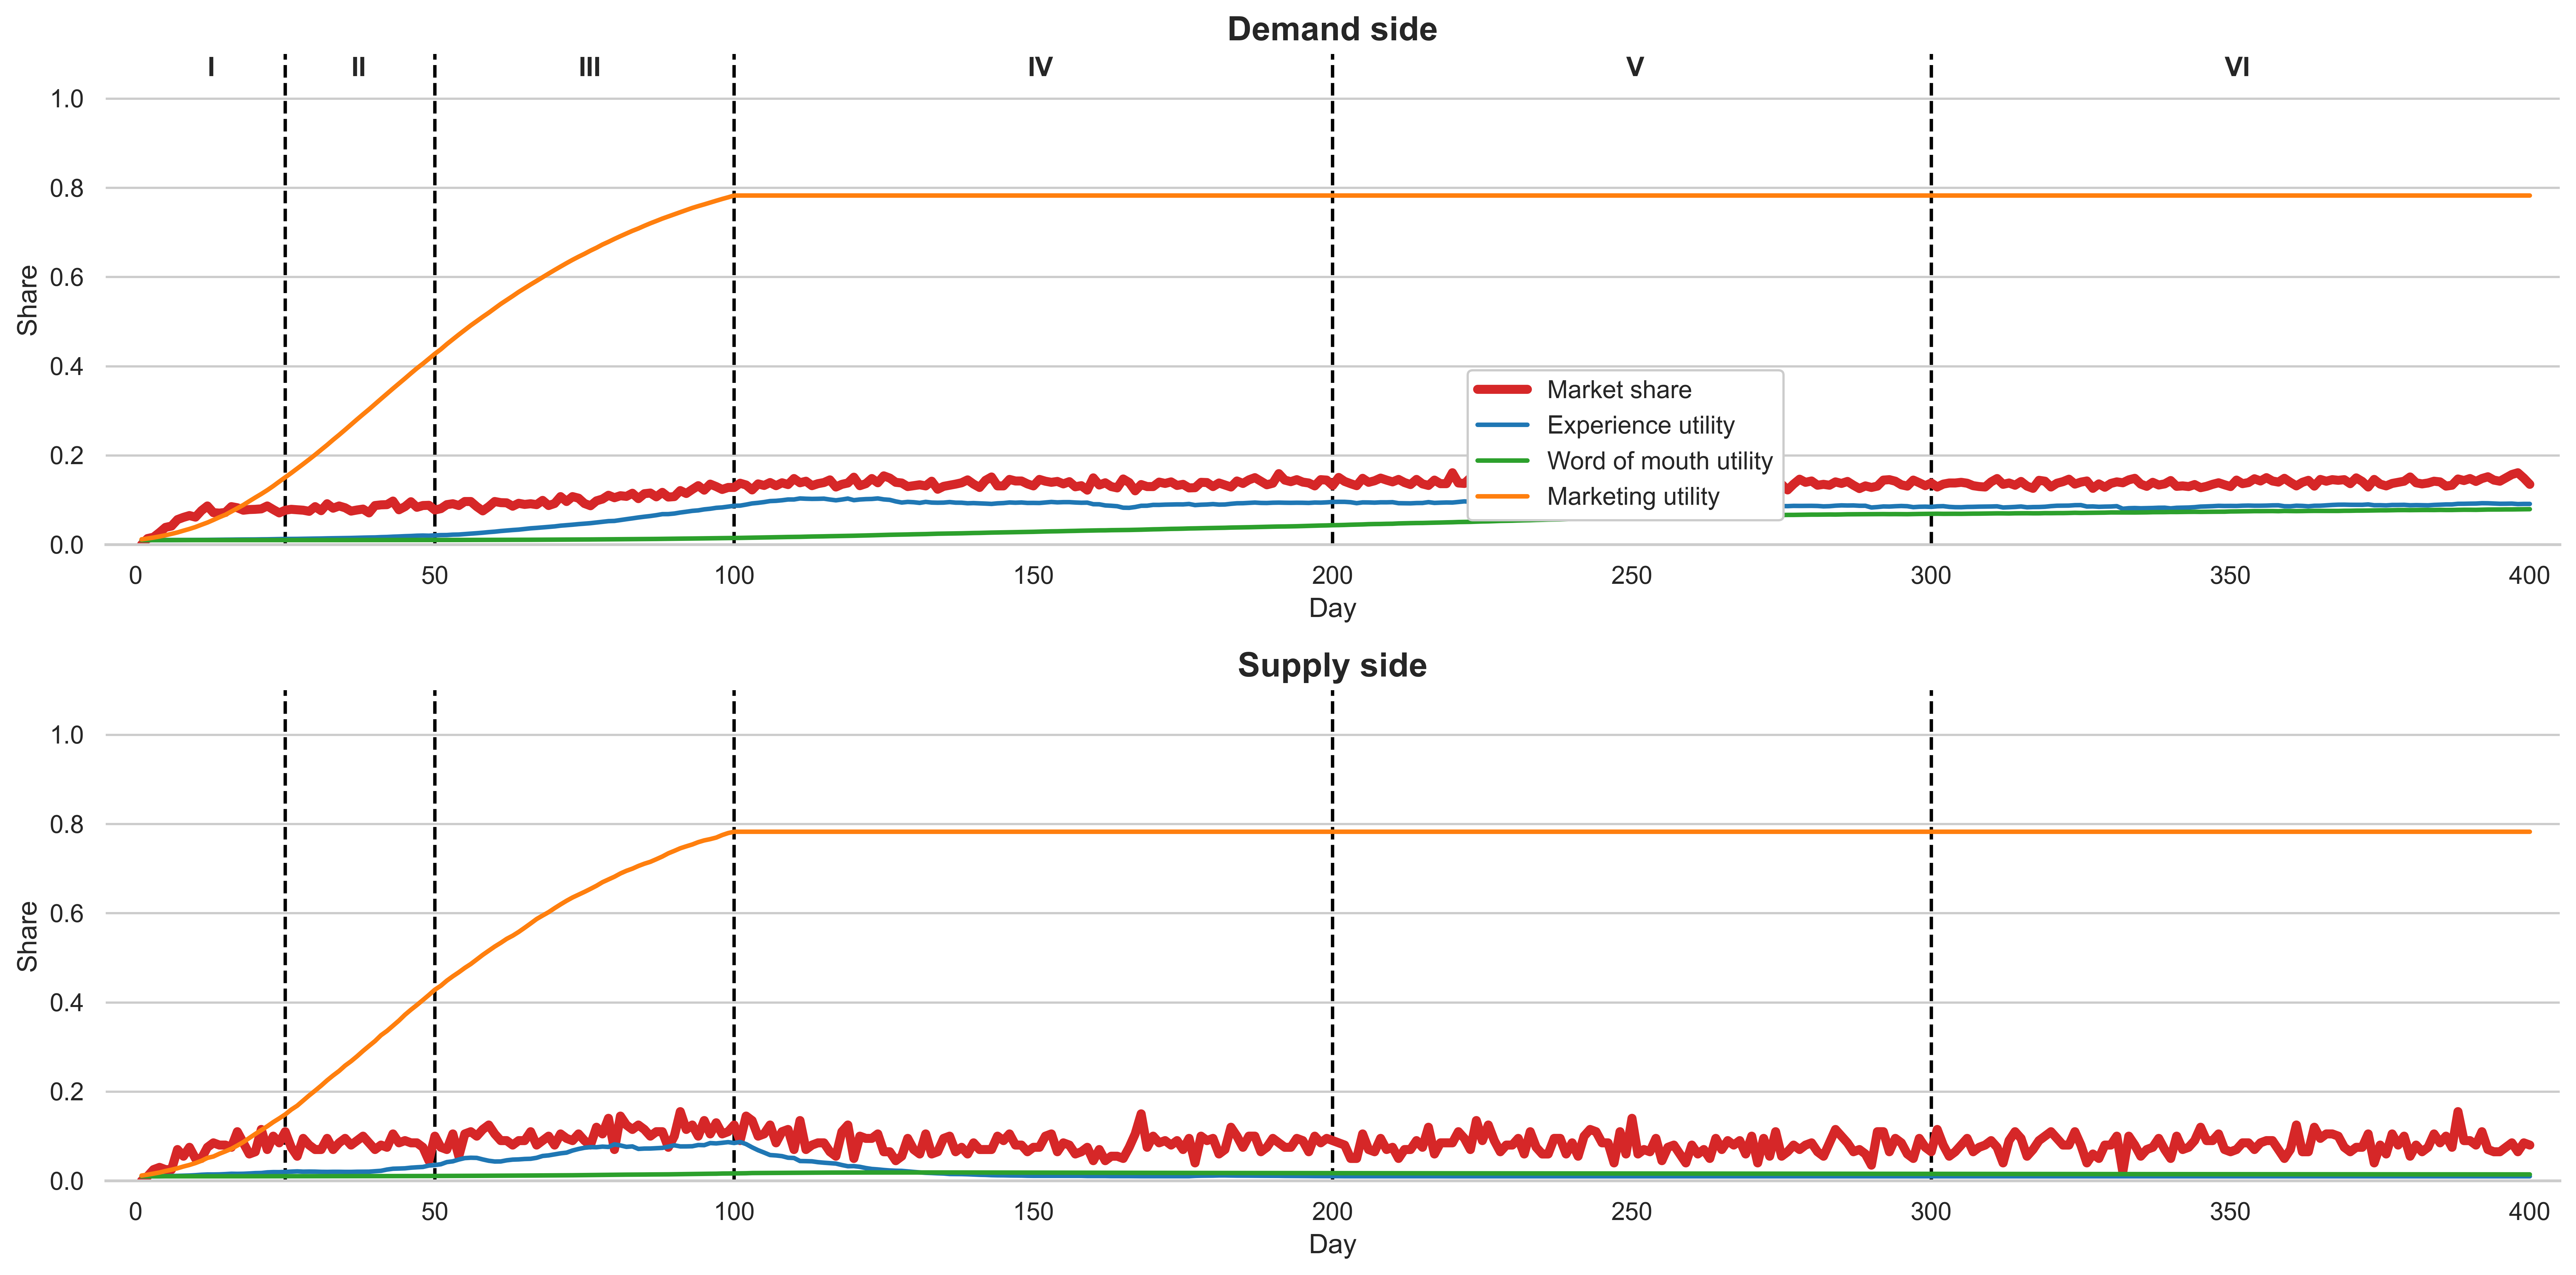

In [10]:
sim0 = sim_rln_train
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].pax_exp.WOM_U.mean())
            ym.append(sim0.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].veh_exp.WOM_U.mean())
            ym.append(sim0.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
sim_rln_test,agent_test = MaaSSim.simulators.simulate_RLn_with_agent(input_agent=agent,params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

In [ ]:
sim_rln_test.RL.to_csv('../RL_EXP/csv/303030_5x/400_24x24x24_1585_0.001_rev_only_test_2.csv')

In [ ]:
sim0 = sim_rln_test
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].pax_exp.WOM_U.mean())
            ym.append(sim0.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].veh_exp.WOM_U.mean())
            ym.append(sim0.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
sim = sim_rln

In [ ]:
sim.res[100].veh_exp

In [ ]:
df = pd.DataFrame()
np = []
nv = []
rev = []
for d in range(0,sim.params.nD):
    np.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    nv.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    rev.append(sim.res[d].pax_exp.plat_revenue.sum())

df['nP_share'] = np
df['nV_share'] = nv
df['Platform_rev'] = rev

df.to_csv('csv/baseline_fast_rev_only.csv')

In [ ]:
sim.res[100].pax_exp.plat_revenue

In [ ]:
df = pd.read_csv('csv/baseline_fast_h.csv')

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev, lw=4)

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev.cumsum(), lw=4)

In [ ]:
sim.platforms.fare[1]

In [ ]:
sim

In [ ]:
df = pd.read_csv('csv/baseline_fast_rev_0.5nP_0.5nV.csv')
df

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
20/582

In [ ]:
=====================================================================================

In [ ]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 5
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
# nV=200, nP=2000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')

In [ ]:
df = pd.read_csv('csv/baseline_fast.csv')
df

In [ ]:
df.Platform_rev.max()

In [ ]:
2638.8502